## Hyper-parameter tuning methods such as grid search and random search are Markdown as they take a lot of time to execute.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv('fetal_health.csv')

In [3]:
from xgboost import XGBClassifier

In [4]:
data.shape

(2126, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [7]:
data.rename(columns = {'baseline value':'baseline',
                     'abnormal_short_term_variability':'abnrml_ST_variability',
                     'mean_value_of_short_term_variability':'mean_ST_variability',
                    'percentage_of_time_with_abnormal_long_term_variability':'abnrml_LT_variability',
                     'mean_value_of_long_term_variability':'mean_of_LT_variability',
                     'histogram_width':'hist_width',
                     'histogram_min':'hist_min',
                     'histogram_max':'hist_max',
                     'histogram_number_of_peaks':'hist_no_of_peaks',
                     'histogram_number_of_zeroes':'hist_no_of_zeroes',
                     'histogram_mode':'hist_mode',
                     'histogram_mean':'hist_mean',
                     'histogram_median':'hist_median',
                     'histogram_variance':'hist_var',
                     'histogram_tendency':'hist_tendency'},inplace = True)

In [8]:
df = data.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   baseline                  2126 non-null   float64
 1   accelerations             2126 non-null   float64
 2   fetal_movement            2126 non-null   float64
 3   uterine_contractions      2126 non-null   float64
 4   light_decelerations       2126 non-null   float64
 5   severe_decelerations      2126 non-null   float64
 6   prolongued_decelerations  2126 non-null   float64
 7   abnrml_ST_variability     2126 non-null   float64
 8   mean_ST_variability       2126 non-null   float64
 9   abnrml_LT_variability     2126 non-null   float64
 10  mean_of_LT_variability    2126 non-null   float64
 11  hist_width                2126 non-null   float64
 12  hist_min                  2126 non-null   float64
 13  hist_max                  2126 non-null   float64
 14  hist_no_

In [10]:
df.describe()

,baseline,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnrml_ST_variability,mean_ST_variability,abnrml_LT_variability,mean_of_LT_variability,hist_width,hist_min,hist_max,hist_no_of_peaks,hist_no_of_zeroes,hist_mode,hist_mean,hist_median,hist_var,hist_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [11]:
df.head()

,baseline,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnrml_ST_variability,mean_ST_variability,abnrml_LT_variability,mean_of_LT_variability,hist_width,hist_min,hist_max,hist_no_of_peaks,hist_no_of_zeroes,hist_mode,hist_mean,hist_median,hist_var,hist_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# NULL VALUES

In [12]:
df.isnull().sum()

baseline                    0
accelerations               0
fetal_movement              0
uterine_contractions        0
light_decelerations         0
severe_decelerations        0
prolongued_decelerations    0
abnrml_ST_variability       0
mean_ST_variability         0
abnrml_LT_variability       0
mean_of_LT_variability      0
hist_width                  0
hist_min                    0
hist_max                    0
hist_no_of_peaks            0
hist_no_of_zeroes           0
hist_mode                   0
hist_mean                   0
hist_median                 0
hist_var                    0
hist_tendency               0
fetal_health                0
dtype: int64

In [13]:
df.isnull().sum().sum() #no null values

0

# EDA

# fetal_health - target variable
1 - Normal 2 - Suspect 3 - Pathelogical

In [14]:
df.fetal_health = df.fetal_health.replace({1.0 : '1 Normal', 2.0 : '2 Suspect', 3.0 : '3 Pathological'})

In [15]:
pd.DataFrame(df.fetal_health.value_counts()) #datapoints are more for 1 compared to other, - resample

,fetal_health
1 Normal,1655
2 Suspect,295
3 Pathological,176


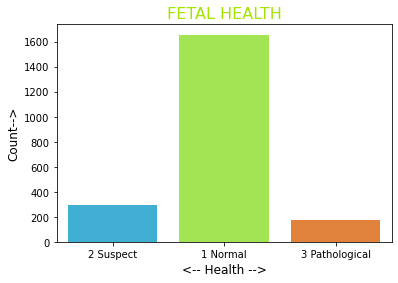

In [16]:
sns.countplot(x = df.fetal_health,palette = 'turbo');
plt.title('FETAL HEALTH',color = '#a2e400',size = 16);
plt.xlabel('<-- Health -->',size = 12);
plt.ylabel('Count-->',size = 12);

# 1) baseline
Baseline Fetal Heart Rate (FHR) 

#continuous

In [17]:
df.baseline.nunique()

48

In [18]:
pd.DataFrame(df.baseline.describe())

,baseline
count,2126.000000
mean,133.303857
std,9.840844
min,106.000000
25%,126.000000
50%,133.000000
75%,140.000000
max,160.000000


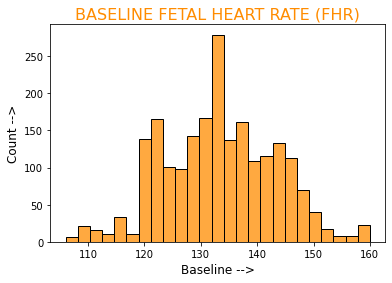

In [19]:
sns.histplot(x = df.baseline,color = 'darkorange');
plt.title('BASELINE FETAL HEART RATE (FHR)',size = 16,color = 'darkorange');
plt.xlabel('Baseline -->',size = 12);
plt.ylabel('Count -->',size = 12);

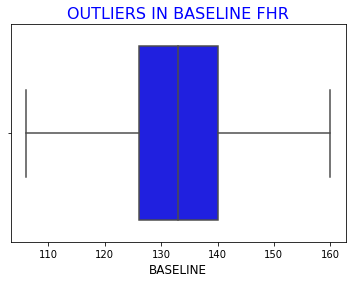

In [20]:
sns.boxplot(x = df.baseline,color = 'blue');
plt.title('OUTLIERS IN BASELINE FHR',color = 'blue',size = 16)
plt.xlabel('BASELINE',size = 12);

An abnormal baseline is termed bradycardia when the baseline FHR is less than 110 bpm; it is termed tachycardia when the baseline FHR is greater than 160 bpm."

In [21]:
df[df.baseline < 110]

,baseline,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnrml_ST_variability,mean_ST_variability,abnrml_LT_variability,mean_of_LT_variability,hist_width,hist_min,hist_max,hist_no_of_peaks,hist_no_of_zeroes,hist_mode,hist_mean,hist_median,hist_var,hist_tendency,fetal_health
1659,106.0,0.011,0.0,0.009,0.0,0.0,0.0,62.0,1.4,0.0,12.7,54.0,94.0,148.0,5.0,0.0,107.0,117.0,116.0,32.0,-1.0,1 Normal
1660,106.0,0.000,0.0,0.010,0.0,0.0,0.0,63.0,0.6,0.0,14.1,28.0,95.0,123.0,1.0,0.0,110.0,109.0,111.0,2.0,0.0,1 Normal
1661,106.0,0.000,0.0,0.010,0.0,0.0,0.0,63.0,0.6,0.0,13.5,28.0,95.0,123.0,1.0,0.0,112.0,109.0,111.0,2.0,0.0,1 Normal
1662,106.0,0.001,0.0,0.011,0.0,0.0,0.0,63.0,0.6,0.0,11.5,30.0,95.0,125.0,1.0,0.0,112.0,110.0,112.0,1.0,0.0,1 Normal
1663,106.0,0.000,0.0,0.010,0.0,0.0,0.0,63.0,0.6,0.0,12.4,27.0,95.0,122.0,1.0,0.0,112.0,110.0,112.0,1.0,0.0,1 Normal
1664,106.0,0.000,0.0,0.009,0.0,0.0,0.0,64.0,0.6,0.0,10.4,20.0,102.0,122.0,1.0,0.0,111.0,111.0,112.0,0.0,0.0,1 Normal
1665,106.0,0.006,0.0,0.006,0.0,0.0,0.0,64.0,0.7,0.0,12.6,54.0,100.0,154.0,3.0,0.0,112.0,116.0,114.0,14.0,-1.0,1 Normal


In [22]:
df[df.baseline > 160]

,baseline,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnrml_ST_variability,mean_ST_variability,abnrml_LT_variability,mean_of_LT_variability,hist_width,hist_min,hist_max,hist_no_of_peaks,hist_no_of_zeroes,hist_mode,hist_mean,hist_median,hist_var,hist_tendency,fetal_health


# 2) accelerations
Number of accelerations per second(heart rate)

#continuous

In [23]:
df.accelerations.nunique()

20

In [24]:
pd.DataFrame(df.accelerations.describe())

,accelerations
count,2126.000000
mean,0.003178
std,0.003866
min,0.000000
25%,0.000000
50%,0.002000
75%,0.006000
max,0.019000


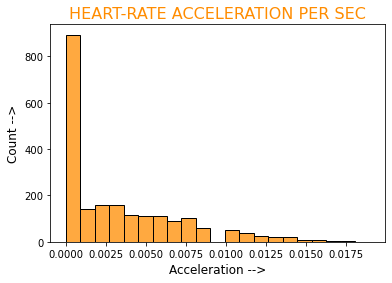

In [25]:
sns.histplot(x = df.accelerations,color = 'darkorange');
plt.title('HEART-RATE ACCELERATION PER SEC',size = 16,color = 'darkorange');
plt.xlabel('Acceleration -->',size = 12);
plt.ylabel('Count -->',size = 12);

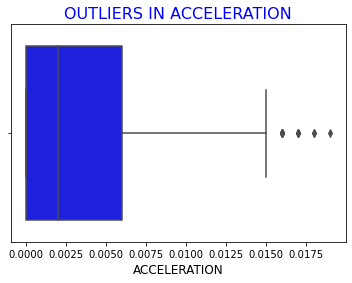

In [26]:
sns.boxplot(x = df.accelerations,color = 'blue');
plt.title('OUTLIERS IN ACCELERATION',color = 'blue',size = 16)
plt.xlabel('ACCELERATION',size = 12);

# 3) fetal_movement
Number of fetal movements per second 

#continuous

In [27]:
df.fetal_movement.nunique()

102

In [28]:
pd.DataFrame(df.fetal_movement.describe())

,fetal_movement
count,2126.000000
mean,0.009481
std,0.046666
min,0.000000
25%,0.000000
50%,0.000000
75%,0.003000
max,0.481000


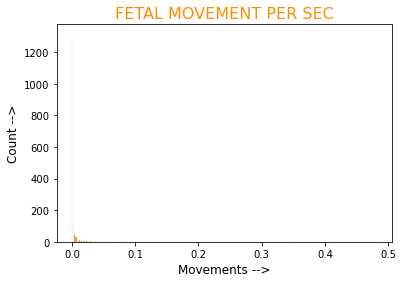

In [29]:
sns.histplot(x = df.fetal_movement,color = 'darkorange');
plt.title('FETAL MOVEMENT PER SEC',size = 16,color = 'darkorange');
plt.xlabel('Movements -->',size = 12);
plt.ylabel('Count -->',size = 12);

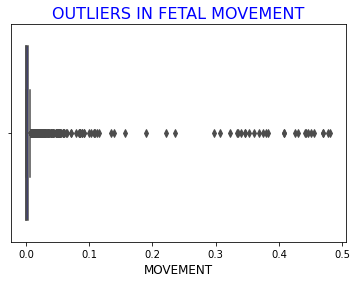

In [30]:
sns.boxplot(x = df.fetal_movement,color = 'blue');
plt.title('OUTLIERS IN FETAL MOVEMENT',color = 'blue',size = 16)
plt.xlabel('MOVEMENT',size = 12);

In [31]:
df.drop(['fetal_movement'],axis = 1,inplace =True) #can't use this column

# 4)uterine_contractions
Number of uterine contractions per second

#continuous

In [32]:
df.uterine_contractions.nunique()

16

In [33]:
pd.DataFrame(df.uterine_contractions.value_counts().sort_index()) #its still continuous

,uterine_contractions
0.000,332
0.001,118
0.002,160
0.003,212
0.004,244
0.005,290
0.006,231
0.007,216
0.008,160
0.009,82


In [34]:
pd.DataFrame(df.uterine_contractions.describe())

,uterine_contractions
count,2126.000000
mean,0.004366
std,0.002946
min,0.000000
25%,0.002000
50%,0.004000
75%,0.007000
max,0.015000


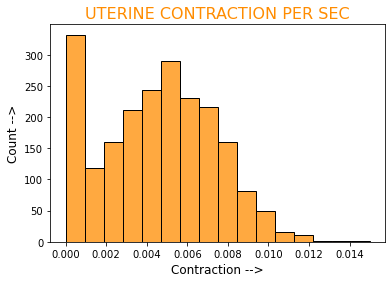

In [35]:
sns.histplot(x = df.uterine_contractions,bins = 16,color = 'darkorange');
plt.title('UTERINE CONTRACTION PER SEC',size = 16,color = 'darkorange');
plt.xlabel('Contraction -->',size = 12);
plt.ylabel('Count -->',size = 12);  

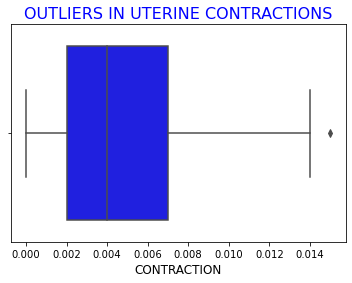

In [36]:
sns.boxplot(x = df.uterine_contractions,color = 'blue');
plt.title('OUTLIERS IN UTERINE CONTRACTIONS',color = 'blue',size = 16)
plt.xlabel('CONTRACTION',size = 12);

# 5) light_decelerations
Number of Light decelerations per second 

#continuous

In [37]:
df.light_decelerations.nunique()

16

In [38]:
pd.DataFrame(df.light_decelerations.value_counts().sort_index())

,light_decelerations
0.000,1231
0.001,163
0.002,115
0.003,118
0.004,114
0.005,107
0.006,74
0.007,54
0.008,55
0.009,37


In [39]:
pd.DataFrame(df.light_decelerations.describe())

,light_decelerations
count,2126.000000
mean,0.001889
std,0.002960
min,0.000000
25%,0.000000
50%,0.000000
75%,0.003000
max,0.015000


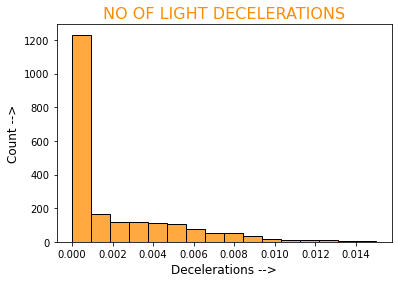

In [40]:
sns.histplot(x = df.light_decelerations,bins = 16,color = 'darkorange');
plt.title('NO OF LIGHT DECELERATIONS',size = 16,color = 'darkorange');
plt.xlabel('Decelerations -->',size = 12);
plt.ylabel('Count -->',size = 12);  

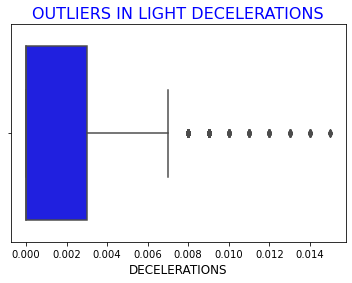

In [41]:
sns.boxplot(x = df.light_decelerations,color = 'blue');
plt.title('OUTLIERS IN LIGHT DECELERATIONS',color = 'blue',size = 16)
plt.xlabel('DECELERATIONS',size = 12);

# 6) severe_decelerations
Number of Severe Decelerations per second 

In [42]:
df.severe_decelerations.nunique()

2

In [43]:
pd.DataFrame(df.severe_decelerations.value_counts())  

,severe_decelerations
0.000,2119
0.001,7


In [44]:
df.drop(['severe_decelerations'],axis = 1,inplace = True)

# 7) prolongued_decelerations
Number of Prolongued Decelerations per second 

#continuous

In [45]:
df.prolongued_decelerations.nunique()

6

In [46]:
pd.DataFrame(df.prolongued_decelerations.value_counts().sort_index())

,prolongued_decelerations
0.000,1948
0.001,70
0.002,72
0.003,24
0.004,9
0.005,3


In [47]:
pd.DataFrame(df.prolongued_decelerations.describe())

,prolongued_decelerations
count,2126.000000
mean,0.000159
std,0.000590
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.005000


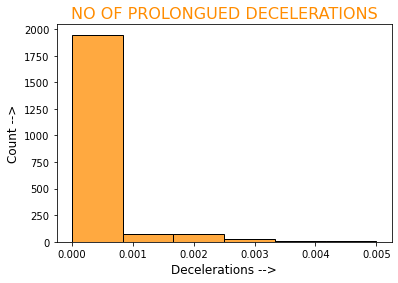

In [48]:
sns.histplot(x = df.prolongued_decelerations,bins = 6,color = 'darkorange');
plt.title('NO OF PROLONGUED DECELERATIONS',size = 16,color = 'darkorange');
plt.xlabel('Decelerations -->',size = 12);
plt.ylabel('Count -->',size = 12);  

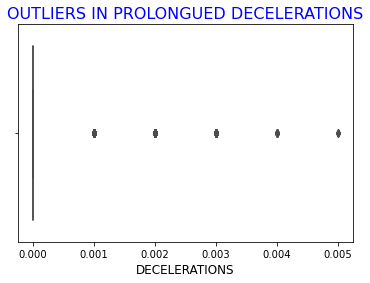

In [49]:
sns.boxplot(x = df.prolongued_decelerations,color = 'blue');
plt.title('OUTLIERS IN PROLONGUED DECELERATIONS',color = 'blue',size = 16)
plt.xlabel('DECELERATIONS',size = 12);

In [50]:
df.drop(['prolongued_decelerations'],axis = 1,inplace = True)

# 8) abnrml_ST_variability
Percentage of time with abnormal short term variability 

#cont

In [51]:
df.abnrml_ST_variability.nunique()

75

In [52]:
pd.DataFrame(df.abnrml_ST_variability.describe())

,abnrml_ST_variability
count,2126.000000
mean,46.990122
std,17.192814
min,12.000000
25%,32.000000
50%,49.000000
75%,61.000000
max,87.000000


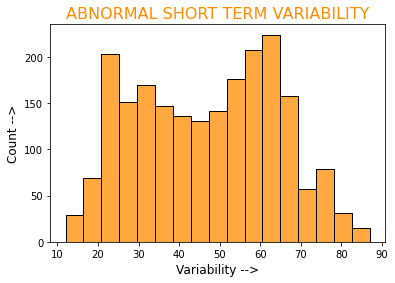

In [53]:
sns.histplot(x = df.abnrml_ST_variability,color = 'darkorange');
plt.title('ABNORMAL SHORT TERM VARIABILITY',size = 16,color = 'darkorange');
plt.xlabel('Variability -->',size = 12);
plt.ylabel('Count -->',size = 12);

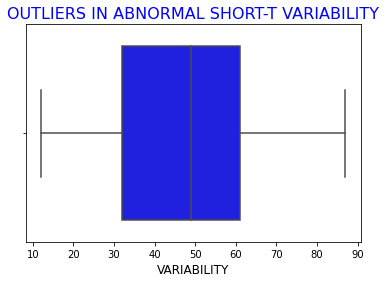

In [54]:
sns.boxplot(x = df.abnrml_ST_variability,color = 'blue');
plt.title('OUTLIERS IN ABNORMAL SHORT-T VARIABILITY',color = 'blue',size = 16)
plt.xlabel('VARIABILITY',size = 12);

# 9) mean_ST_variability
Mean value of short term variability 

#continuous

In [55]:
df.mean_ST_variability.nunique()

57

In [56]:
pd.DataFrame(df.mean_ST_variability.describe())

,mean_ST_variability
count,2126.000000
mean,1.332785
std,0.883241
min,0.200000
25%,0.700000
50%,1.200000
75%,1.700000
max,7.000000


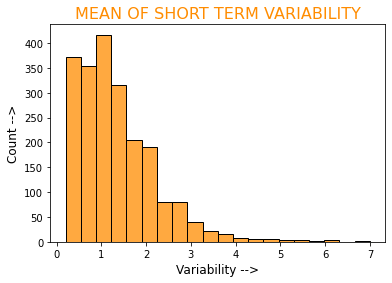

In [57]:
sns.histplot(x = df.mean_ST_variability,bins = 20,color = 'darkorange');
plt.title('MEAN OF SHORT TERM VARIABILITY',size = 16,color = 'darkorange');
plt.xlabel('Variability -->',size = 12);
plt.ylabel('Count -->',size = 12);

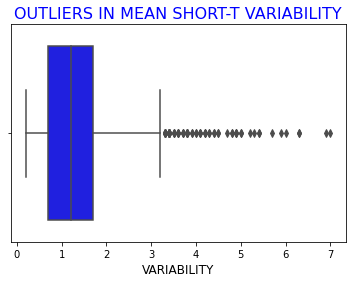

In [58]:
sns.boxplot(x = df.mean_ST_variability,color = 'blue');
plt.title('OUTLIERS IN MEAN SHORT-T VARIABILITY',color = 'blue',size = 16)
plt.xlabel('VARIABILITY',size = 12);

# 10) abnrml_LT_variability
Percentage of time with abnormal long term variability #cont

In [59]:
df.abnrml_LT_variability.nunique()

87

In [60]:
pd.DataFrame(df.abnrml_LT_variability.describe())

,abnrml_LT_variability
count,2126.00000
mean,9.84666
std,18.39688
min,0.00000
25%,0.00000
50%,0.00000
75%,11.00000
max,91.00000


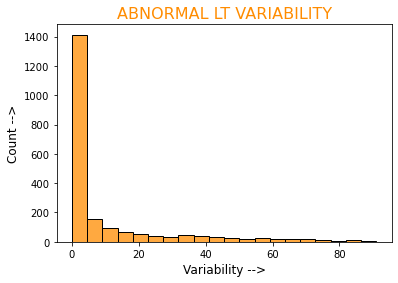

In [61]:
sns.histplot(x = df.abnrml_LT_variability,bins = 20,color = 'darkorange');
plt.title('ABNORMAL LT VARIABILITY',size = 16,color = 'darkorange');
plt.xlabel('Variability -->',size = 12);
plt.ylabel('Count -->',size = 12);

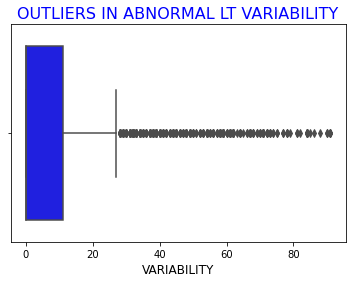

In [62]:
sns.boxplot(x = df.abnrml_LT_variability,color = 'blue');
plt.title('OUTLIERS IN ABNORMAL LT VARIABILITY',color = 'blue',size = 16)
plt.xlabel('VARIABILITY',size = 12);

# 11) mean_of_LT_variability
Mean value of long term variability

In [63]:
df.mean_of_LT_variability.nunique()

249

In [64]:
pd.DataFrame(df.mean_of_LT_variability.describe())

,mean_of_LT_variability
count,2126.000000
mean,8.187629
std,5.628247
min,0.000000
25%,4.600000
50%,7.400000
75%,10.800000
max,50.700000


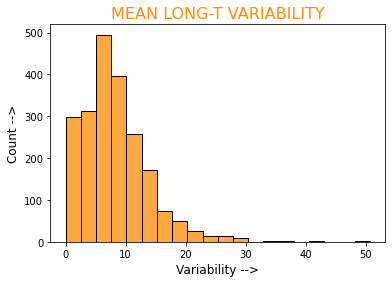

In [65]:
sns.histplot(x = df.mean_of_LT_variability,bins = 20,color = 'darkorange');
plt.title('MEAN LONG-T VARIABILITY',size = 16,color = 'darkorange');
plt.xlabel('Variability -->',size = 12);
plt.ylabel('Count -->',size = 12);

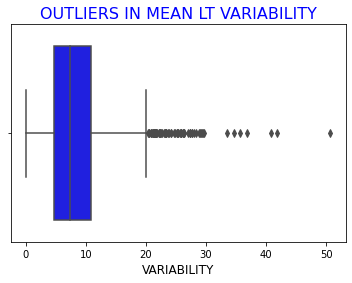

In [66]:
sns.boxplot(x = df.mean_of_LT_variability,color = 'blue');
plt.title('OUTLIERS IN MEAN LT VARIABILITY',color = 'blue',size = 16)
plt.xlabel('VARIABILITY',size = 12);

# 12) hist_width

In [67]:
df.hist_width.nunique()

154

In [68]:
pd.DataFrame(df.hist_width.describe())

,hist_width
count,2126.000000
mean,70.445908
std,38.955693
min,3.000000
25%,37.000000
50%,67.500000
75%,100.000000
max,180.000000


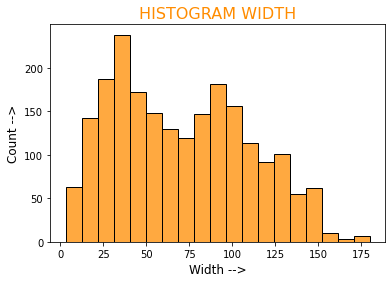

In [69]:
sns.histplot(x = df.hist_width,color = 'darkorange');
plt.title('HISTOGRAM WIDTH',size = 16,color = 'darkorange');
plt.xlabel('Width -->',size = 12);
plt.ylabel('Count -->',size = 12);

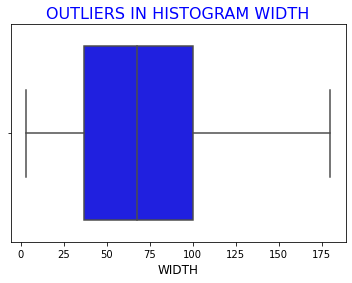

In [70]:
sns.boxplot(x = df.hist_width,color = 'blue');
plt.title('OUTLIERS IN HISTOGRAM WIDTH',color = 'blue',size = 16)
plt.xlabel('WIDTH',size = 12);

# 13) hist_min

In [71]:
df.hist_min.nunique()

109

In [72]:
pd.DataFrame(df.hist_min.describe())

,hist_min
count,2126.000000
mean,93.579492
std,29.560212
min,50.000000
25%,67.000000
50%,93.000000
75%,120.000000
max,159.000000


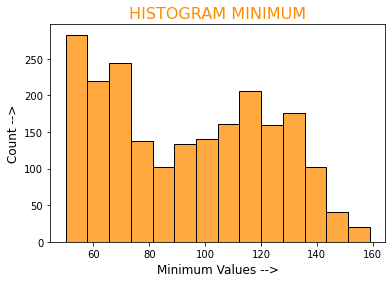

In [73]:
sns.histplot(x = df.hist_min,color = 'darkorange');
plt.title('HISTOGRAM MINIMUM',size = 16,color = 'darkorange');
plt.xlabel('Minimum Values -->',size = 12);
plt.ylabel('Count -->',size = 12);

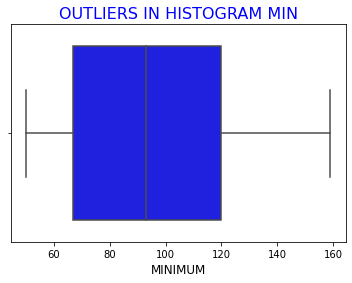

In [74]:
sns.boxplot(x = df.hist_min,color = 'blue');
plt.title('OUTLIERS IN HISTOGRAM MIN',color = 'blue',size = 16)
plt.xlabel('MINIMUM',size = 12);

# 14) hist_max
Histogram maximum value

In [75]:
df.hist_max.nunique()

86

In [76]:
pd.DataFrame(df.hist_max.describe())

,hist_max
count,2126.000000
mean,164.025400
std,17.944183
min,122.000000
25%,152.000000
50%,162.000000
75%,174.000000
max,238.000000


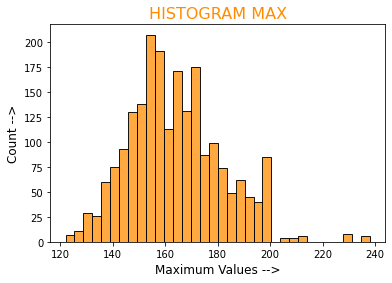

In [77]:
sns.histplot(x = df.hist_max,color = 'darkorange');
plt.title('HISTOGRAM MAX',size = 16,color = 'darkorange');
plt.xlabel('Maximum Values -->',size = 12);
plt.ylabel('Count -->',size = 12);

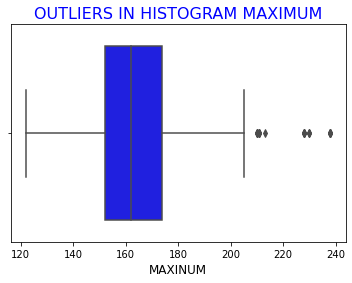

In [78]:
sns.boxplot(x = df.hist_max,color = 'blue');
plt.title('OUTLIERS IN HISTOGRAM MAXIMUM',color = 'blue',size = 16)
plt.xlabel('MAXINUM',size = 12);

# 15) hist_no_of_peaks
Number of peaks in the exam histogram

In [79]:
df.hist_no_of_peaks.nunique()

18

In [80]:
pd.DataFrame(df.hist_no_of_peaks.describe())

,hist_no_of_peaks
count,2126.000000
mean,4.068203
std,2.949386
min,0.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,18.000000


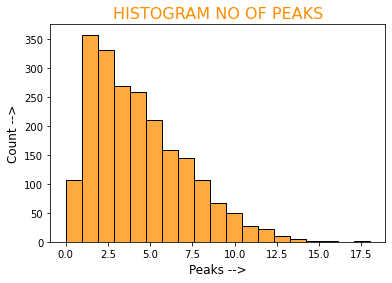

In [81]:
sns.histplot(x = df.hist_no_of_peaks,bins = 19,color = 'darkorange');
plt.title('HISTOGRAM NO OF PEAKS',size = 16,color = 'darkorange');
plt.xlabel('Peaks -->',size = 12);
plt.ylabel('Count -->',size = 12);

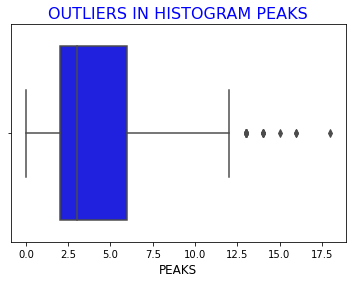

In [82]:
sns.boxplot(x = df.hist_no_of_peaks,color = 'blue');
plt.title('OUTLIERS IN HISTOGRAM PEAKS',color = 'blue',size = 16)
plt.xlabel('PEAKS',size = 12);

# 16) hist_no_of_zeroes
Number of zeroes in the exam histogram #cat

In [83]:
df.hist_no_of_zeroes.nunique()

9

In [84]:
pd.DataFrame(df.hist_no_of_zeroes.value_counts().sort_index())

,hist_no_of_zeroes
0.0,1624
1.0,366
2.0,108
3.0,21
4.0,2
5.0,2
7.0,1
8.0,1
10.0,1


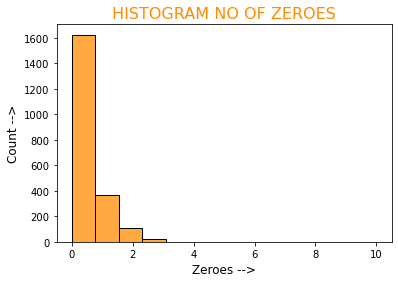

In [85]:
sns.histplot(x = df.hist_no_of_zeroes,color = 'darkorange');
plt.title('HISTOGRAM NO OF ZEROES',size = 16,color = 'darkorange');
plt.xlabel('Zeroes -->',size = 12);
plt.ylabel('Count -->',size = 12);

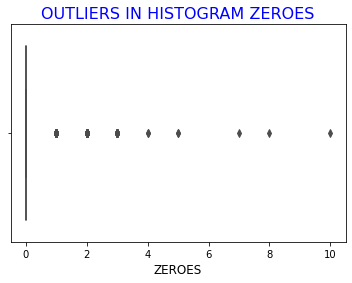

In [86]:
sns.boxplot(x = df.hist_no_of_zeroes,color = 'blue');
plt.title('OUTLIERS IN HISTOGRAM ZEROES',color = 'blue',size = 16)
plt.xlabel('ZEROES',size = 12);

In [87]:
df.drop(['hist_no_of_zeroes'],axis = 1,inplace = True)

# 17) hist_mode
#CONT

In [88]:
df.hist_mode.nunique()

88

In [89]:
pd.DataFrame(df.hist_mode.describe())

,hist_mode
count,2126.000000
mean,137.452023
std,16.381289
min,60.000000
25%,129.000000
50%,139.000000
75%,148.000000
max,187.000000


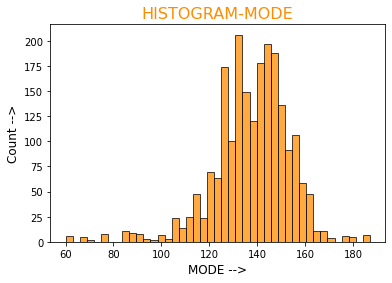

In [90]:
sns.histplot(x = df.hist_mode,color = 'darkorange');
plt.title('HISTOGRAM-MODE',size = 16,color = 'darkorange');
plt.xlabel('MODE -->',size = 12);
plt.ylabel('Count -->',size = 12);

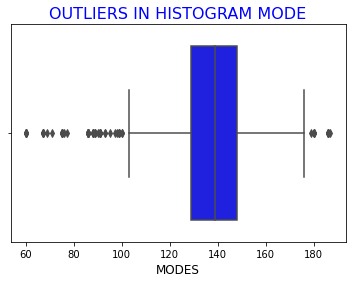

In [91]:
sns.boxplot(x = df.hist_mode,color = 'blue');
plt.title('OUTLIERS IN HISTOGRAM MODE',color = 'blue',size = 16)
plt.xlabel('MODES',size = 12);

# 18) hist_mean
Hist mean

In [92]:
df.hist_mean.nunique()

103

In [93]:
pd.DataFrame(df.hist_mean.describe())

,hist_mean
count,2126.000000
mean,134.610536
std,15.593596
min,73.000000
25%,125.000000
50%,136.000000
75%,145.000000
max,182.000000


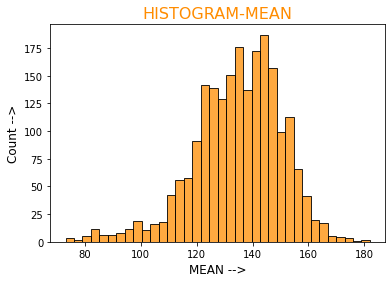

In [94]:
sns.histplot(x = df.hist_mean,color = 'darkorange');
plt.title('HISTOGRAM-MEAN',size = 16,color = 'darkorange');
plt.xlabel('MEAN -->',size = 12);
plt.ylabel('Count -->',size = 12);

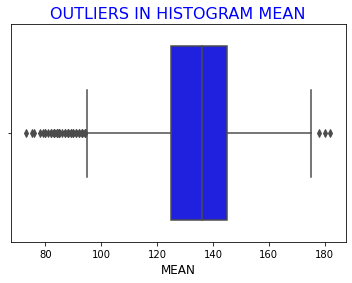

In [95]:
sns.boxplot(x = df.hist_mean,color = 'blue');
plt.title('OUTLIERS IN HISTOGRAM MEAN',color = 'blue',size = 16)
plt.xlabel('MEAN',size = 12);

# 19) hist_median
Hist Median

In [96]:
df.hist_median.nunique()

95

In [97]:
pd.DataFrame(df.hist_median.describe())

,hist_median
count,2126.000000
mean,138.090310
std,14.466589
min,77.000000
25%,129.000000
50%,139.000000
75%,148.000000
max,186.000000


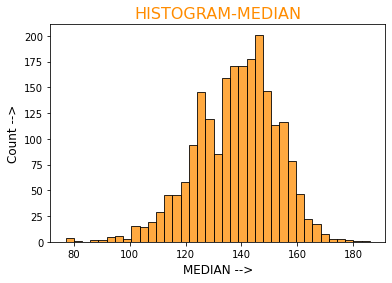

In [98]:
sns.histplot(x = df.hist_median,color = 'darkorange');
plt.title('HISTOGRAM-MEDIAN',size = 16,color = 'darkorange');
plt.xlabel('MEDIAN -->',size = 12);
plt.ylabel('Count -->',size = 12);

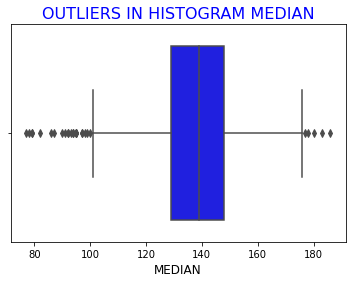

In [99]:
sns.boxplot(x = df.hist_median,color = 'blue');
plt.title('OUTLIERS IN HISTOGRAM MEDIAN',color = 'blue',size = 16)
plt.xlabel('MEDIAN',size = 12);

# 20) hist_var
Hist variance

In [100]:
df.hist_var.nunique()

133

In [101]:
pd.DataFrame(df.hist_var.describe())

,hist_var
count,2126.000000
mean,18.808090
std,28.977636
min,0.000000
25%,2.000000
50%,7.000000
75%,24.000000
max,269.000000


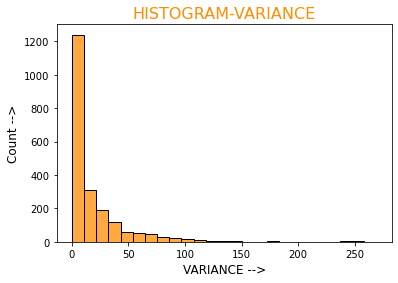

In [102]:
sns.histplot(x = df.hist_var,bins = 25,color = 'darkorange');
plt.title('HISTOGRAM-VARIANCE',size = 16,color = 'darkorange');
plt.xlabel('VARIANCE -->',size = 12);
plt.ylabel('Count -->',size = 12);

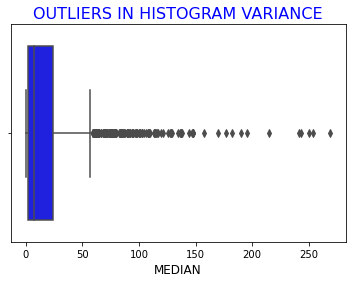

In [103]:
sns.boxplot(x = df.hist_var,color = 'blue');
plt.title('OUTLIERS IN HISTOGRAM VARIANCE',color = 'blue',size = 16)
plt.xlabel('MEDIAN',size = 12);

# 21) hist_tendency
Histogram trend:

-1 : Decelerating , 0 : Stable , 1 : Accelerating

In [104]:
df.hist_tendency.nunique()

3

In [105]:
df.hist_tendency = df.hist_tendency.replace({-1.0:'-1 Decelerating', 0.0:'0 Stable', 1.0:'1 Accelerating'})

In [106]:
pd.DataFrame(df.hist_tendency.value_counts().sort_index())

,hist_tendency
-1 Decelerating,165
0 Stable,1115
1 Accelerating,846


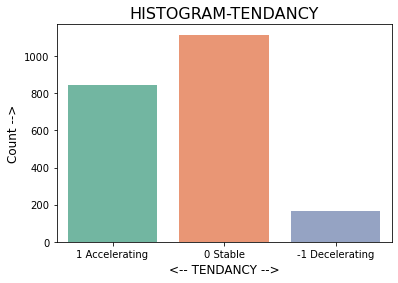

In [107]:
sns.countplot(x = df.hist_tendency,palette = 'Set2');
plt.title('HISTOGRAM-TENDANCY',size = 16);
plt.xlabel('<-- TENDANCY -->',size = 12);
plt.ylabel('Count -->',size = 12);

In [108]:
pd.DataFrame(df.hist_tendency.groupby(df['fetal_health']).value_counts())

hist_tendency
fetal_health   hist_tendency                 
1 Normal       0 Stable                   887
               1 Accelerating             667
               -1 Decelerating            101
2 Suspect      1 Accelerating             143
               0 Stable                   137
               -1 Decelerating             15
3 Pathological 0 Stable                    91
               -1 Decelerating             49
               1 Accelerating              36

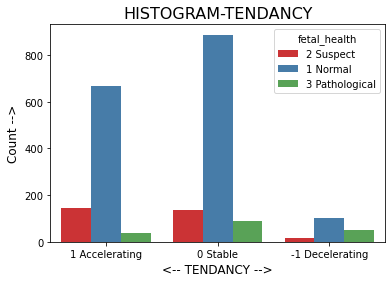

In [109]:
sns.countplot(x = df.hist_tendency,hue = df.fetal_health,palette = 'Set1');
plt.title('HISTOGRAM-TENDANCY',size = 16);
plt.xlabel('<-- TENDANCY -->',size = 12);
plt.ylabel('Count -->',size = 12);

In [110]:
df.hist_tendency = df.hist_tendency.replace({'-1 Decelerating':-1.0, '0 Stable':0.0, '1 Accelerating':1.0})

In [111]:
df.fetal_health = df.fetal_health.replace({'1 Normal' : 1.0, '2 Suspect':2.0 , '3 Pathological':3.0})

In [112]:
df.columns 

Index(['baseline', 'accelerations', 'uterine_contractions',
       'light_decelerations', 'abnrml_ST_variability', 'mean_ST_variability',
       'abnrml_LT_variability', 'mean_of_LT_variability', 'hist_width',
       'hist_min', 'hist_max', 'hist_no_of_peaks', 'hist_mode', 'hist_mean',
       'hist_median', 'hist_var', 'hist_tendency', 'fetal_health'],
      dtype='object')

-----------------------------------------------------------------------------------------------------------------------------------

In [113]:
cont_features = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]] #continuous variables
cont_features

,baseline,accelerations,uterine_contractions,light_decelerations,abnrml_ST_variability,mean_ST_variability,abnrml_LT_variability,mean_of_LT_variability,hist_width,hist_min,hist_max,hist_no_of_peaks,hist_mode,hist_mean,hist_median,hist_var
0,120.0,0.000,0.000,0.000,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,120.0,137.0,121.0,73.0
1,132.0,0.006,0.006,0.003,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,141.0,136.0,140.0,12.0
2,133.0,0.003,0.008,0.003,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,141.0,135.0,138.0,13.0
3,134.0,0.003,0.008,0.003,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,137.0,134.0,137.0,13.0
4,132.0,0.007,0.008,0.000,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,137.0,136.0,138.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.007,0.000,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,153.0,150.0,152.0,2.0
2122,140.0,0.001,0.007,0.000,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,152.0,148.0,151.0,3.0
2123,140.0,0.001,0.007,0.000,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,153.0,148.0,152.0,4.0
2124,140.0,0.001,0.006,0.000,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,152.0,147.0,151.0,4.0


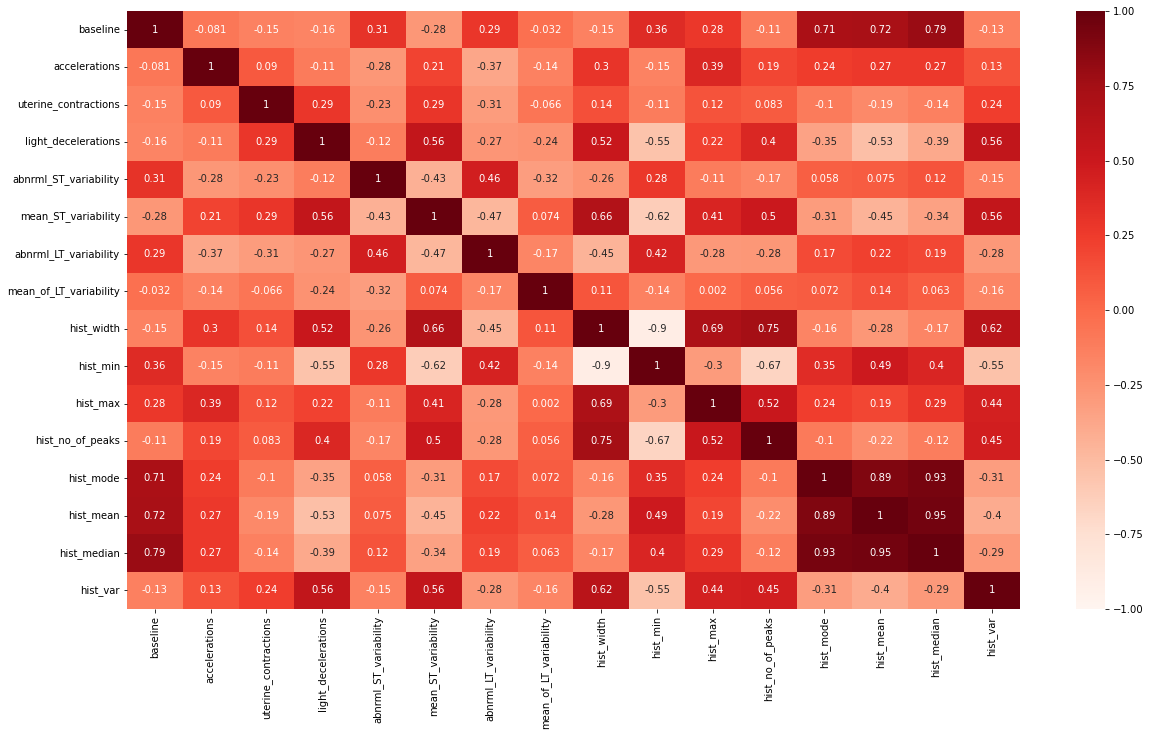

In [114]:
plt.figure(figsize=(20,11))
sns.heatmap(cont_features.corr(),vmin = -1,vmax = 1,annot=True,cmap = 'Reds');

### Standardize

In [115]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [116]:
cont_features_sc = pd.DataFrame(sc.fit_transform(cont_features),columns = cont_features.columns)
cont_features_sc.head()

,baseline,accelerations,uterine_contractions,light_decelerations,abnrml_ST_variability,mean_ST_variability,abnrml_LT_variability,mean_of_LT_variability,hist_width,hist_min,hist_max,hist_no_of_peaks,hist_mode,hist_mean,hist_median,hist_var
0,-1.352220,-0.822388,-1.482465,-0.638438,1.513190,-0.943095,1.802542,-1.028560,-0.165507,-1.068562,-2.119592,-0.701397,-1.065614,0.153270,-1.181642,1.870569
1,-0.132526,0.730133,0.554627,0.375243,-1.744751,0.868841,-0.535361,0.393176,1.529124,-0.865539,1.893794,0.655137,0.216638,0.089126,0.132038,-0.234998
2,-0.030884,-0.046128,1.233657,0.375243,-1.802928,0.868841,-0.535361,0.926327,1.529124,-0.865539,1.893794,0.316003,0.216638,0.024982,-0.006244,-0.200481
3,0.070757,-0.046128,1.233657,0.375243,-1.802928,1.208579,-0.535361,2.632411,1.195333,-1.373097,0.333033,2.350804,-0.027600,-0.039162,-0.075385,-0.200481
4,-0.132526,0.988886,1.233657,-0.638438,-1.802928,1.208579,-0.535361,2.081488,1.195333,-1.373097,0.333033,1.672537,-0.027600,0.089126,-0.006244,-0.269516


In [117]:
non_cont = [i for i in df.columns if i not in cont_features.columns]
df[non_cont].head()

,hist_tendency,fetal_health
0,1.0,2.0
1,0.0,1.0
2,0.0,1.0
3,1.0,1.0
4,1.0,1.0


In [118]:
df = pd.concat([cont_features,df[non_cont]],axis = 1)

In [119]:
df.head()

,baseline,accelerations,uterine_contractions,light_decelerations,abnrml_ST_variability,mean_ST_variability,abnrml_LT_variability,mean_of_LT_variability,hist_width,hist_min,hist_max,hist_no_of_peaks,hist_mode,hist_mean,hist_median,hist_var,hist_tendency,fetal_health
0,120.0,0.000,0.000,0.000,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.006,0.003,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.008,0.003,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.008,0.003,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.008,0.000,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,137.0,136.0,138.0,11.0,1.0,1.0


In [120]:
df.shape

(2126, 18)

### X and y 

In [121]:
X = df.drop(['fetal_health'],axis = 1)
y = df['fetal_health']

In [122]:
print(X.shape)
print(y.shape)

(2126, 17)
(2126,)


### train and test

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 808) #split for non-smote data

In [125]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1700, 17)
(426, 17)
(1700,)
(426,)


# SMOTE

In [126]:
df.fetal_health.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [127]:
norm = df[df.fetal_health == 1.0]
susp = df[df.fetal_health == 2.0]
ptlg = df[df.fetal_health == 3.0]

In [128]:
norm.shape

(1655, 18)

In [129]:
susp_oversample = resample(susp,replace = True,n_samples = len(norm),random_state = 8)

In [130]:
susp_oversample.shape

(1655, 18)

In [131]:
ptlg_oversample = resample(ptlg,replace = True,n_samples = len(norm),random_state = 8)

In [132]:
ptlg_oversample.shape

(1655, 18)

In [133]:
df_smote = pd.concat([norm,susp_oversample,ptlg_oversample],axis = 0)

In [134]:
df_smote = df_smote.sample(frac = 1,random_state = 66).reset_index(drop = True) #shuffle

In [135]:
df_smote.fetal_health.value_counts()

2.0    1655
1.0    1655
3.0    1655
Name: fetal_health, dtype: int64

In [136]:
df_smote.head()

,baseline,accelerations,uterine_contractions,light_decelerations,abnrml_ST_variability,mean_ST_variability,abnrml_LT_variability,mean_of_LT_variability,hist_width,hist_min,hist_max,hist_no_of_peaks,hist_mode,hist_mean,hist_median,hist_var,hist_tendency,fetal_health
0,137.0,0.000,0.001,0.000,77.0,0.2,40.0,6.6,29.0,127.0,156.0,2.0,138.0,141.0,141.0,3.0,0.0,2.0
1,138.0,0.004,0.004,0.006,50.0,1.9,0.0,5.6,102.0,70.0,172.0,8.0,142.0,137.0,142.0,32.0,1.0,1.0
2,152.0,0.000,0.003,0.000,61.0,0.4,71.0,5.8,30.0,134.0,164.0,4.0,160.0,158.0,160.0,1.0,1.0,3.0
3,145.0,0.000,0.001,0.000,50.0,0.7,17.0,7.3,42.0,125.0,167.0,8.0,153.0,154.0,155.0,2.0,1.0,2.0
4,135.0,0.000,0.002,0.000,65.0,0.4,68.0,5.0,25.0,116.0,141.0,3.0,136.0,135.0,137.0,0.0,1.0,2.0


### X and y 

In [137]:
Xs = df_smote.drop(['fetal_health'],axis = 1)
ys = df_smote['fetal_health']

In [138]:
print(Xs.shape)
print(ys.shape)

(4965, 17)
(4965,)


### train and test

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
Xtrain,Xtest,ytrain,ytest = train_test_split(Xs,ys,test_size = 0.2,random_state = 808) #split for smote data

In [141]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3972, 17)
(993, 17)
(3972,)
(993,)


# MODELS


## 1) DECISION TREE

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
dt = DecisionTreeClassifier(random_state = 86)

In [144]:
model_params = {'criterion' : ['gini','entropy'],
                'max_depth': [2,3,4,5,6,7,8,9,None],
               'min_samples_split' : [i for i in range (1,11)]}

search = GridSearchCV(dt,model_params,cv = 10)
search.fit(X_train,y_train)
search.best_params_

In [145]:
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 7 ,min_samples_split = 9,random_state = 86)

In [146]:
model = dt.fit(X_train,y_train)

In [147]:
accuracy_score(model.predict(X_train),y_train)

0.9576470588235294

##### evaluation

In [148]:
y_pred = model.predict(X_test)

In [149]:
accuracy_score(y_pred,y_test)#                                                                                0.9389671361502347

0.9389671361502347

In [150]:
pd.DataFrame(confusion_matrix(y_test,y_pred,labels = [1,2,3]),index = [1,2,3],columns = [1,2,3])

,1,2,3
1,341,6,2
2,12,37,0
3,5,1,22


In [151]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       349
         2.0       0.84      0.76      0.80        49
         3.0       0.92      0.79      0.85        28

    accuracy                           0.94       426
   macro avg       0.90      0.84      0.87       426
weighted avg       0.94      0.94      0.94       426



## 2) DECISION TREE - smote 

In [152]:
dt = DecisionTreeClassifier(random_state = 86)

In [153]:
model_params = {'criterion' : ['gini','entropy'],
                'max_depth': [2,3,4,5,6,7,8,9,None],
               'min_samples_split' : [i for i in range (1,11)]}

search = GridSearchCV(dt,model_params,cv = 10)
search.fit(Xtrain,ytrain)
search.best_params_

In [154]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = None,min_samples_split = 3,random_state = 86)

In [155]:
model2 = dt.fit(Xtrain,ytrain)

In [156]:
accuracy_score(model2.predict(Xtrain),ytrain)  

0.999496475327291

##### evaluation

In [157]:
y_pred2 = model2.predict(Xtest)

In [158]:
accuracy_score(y_pred2,ytest)#                                                                                0.9758308157099698

0.9758308157099698

In [159]:
pd.DataFrame(confusion_matrix(ytest,y_pred2,labels = [1,2,3]),index = [1,2,3],columns = [1,2,3])

,1,2,3
1,319,22,2
2,0,313,0
3,0,0,337


In [160]:
print(classification_report(ytest,y_pred2))

              precision    recall  f1-score   support

         1.0       1.00      0.93      0.96       343
         2.0       0.93      1.00      0.97       313
         3.0       0.99      1.00      1.00       337

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993



## 3) RANDOM FOREST 

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
rf = RandomForestClassifier(random_state = 86)

In [163]:
params = {'criterion' : ['gini','entropy'],
          'n_estimators':[20,40,60,80,100,120],
          'max_features':['sqrt',0.25,0.50,0.75,1]}

In [ ]:
search = GridSearchCV(rf,params,n_jobs = -1,cv = 10)
search.fit(X_train,y_train)
search.best_params_

In [164]:
rf = RandomForestClassifier(criterion = 'entropy',n_estimators = 100 ,max_features = 0.5 ,random_state = 83)

In [165]:
model3 = rf.fit(X_train,y_train)

In [166]:
accuracy_score(model3.predict(X_train),y_train)

0.9994117647058823

##### evaluation

In [167]:
y_pred3 = model3.predict(X_test)

In [168]:
accuracy_score(y_pred3,y_test)#                                                                               0.9624413145539906

0.9624413145539906

In [169]:
pd.DataFrame(confusion_matrix(y_test,y_pred3,labels = [1,2,3]),index = [1,2,3],columns = [1,2,3])

,1,2,3
1,347,2,0
2,7,41,1
3,5,1,22


In [170]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       349
         2.0       0.93      0.84      0.88        49
         3.0       0.96      0.79      0.86        28

    accuracy                           0.96       426
   macro avg       0.95      0.87      0.91       426
weighted avg       0.96      0.96      0.96       426



## 4) RANDOM FOREST - smote

In [171]:
rf = RandomForestClassifier(random_state = 86)

In [172]:
params = {'criterion' : ['gini','entropy'],
          'n_estimators':[20,40,60,80,100,120],
          'max_features':['sqrt',0.25,0.50,0.75,1]}

In [ ]:
search = GridSearchCV(rf,params,n_jobs = -1,cv = 10)
search.fit(Xtrain,ytrain)
search.best_params_

In [173]:
rf = RandomForestClassifier(criterion = 'gini',n_estimators = 60,max_features = 1,random_state = 83)

In [174]:
model4 = rf.fit(Xtrain,ytrain)

In [175]:
accuracy_score(model4.predict(Xtrain),ytrain)

0.999496475327291

##### evaluation

In [176]:
y_pred4 = model4.predict(Xtest)

In [177]:
accuracy_score(y_pred4,ytest)#                                                                                0.9929506545820745

0.9929506545820745

In [178]:
pd.DataFrame(confusion_matrix(ytest,y_pred4,labels = [1,2,3]),index = [1,2,3],columns = [1,2,3])

,1,2,3
1,336,7,0
2,0,313,0
3,0,0,337


In [179]:
print(classification_report(ytest,y_pred4))

              precision    recall  f1-score   support

         1.0       1.00      0.98      0.99       343
         2.0       0.98      1.00      0.99       313
         3.0       1.00      1.00      1.00       337

    accuracy                           0.99       993
   macro avg       0.99      0.99      0.99       993
weighted avg       0.99      0.99      0.99       993



## HANDLING OUTLIERS

In [180]:
df = data.copy()

In [181]:
df.drop(['fetal_movement','severe_decelerations','prolongued_decelerations','hist_no_of_zeroes'],axis = 1,inplace = True) #dropped during visulization

In [182]:
df.head()

,baseline,accelerations,uterine_contractions,light_decelerations,abnrml_ST_variability,mean_ST_variability,abnrml_LT_variability,mean_of_LT_variability,hist_width,hist_min,hist_max,hist_no_of_peaks,hist_mode,hist_mean,hist_median,hist_var,hist_tendency,fetal_health
0,120.0,0.000,0.000,0.000,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.006,0.003,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.008,0.003,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.008,0.003,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.008,0.000,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,137.0,136.0,138.0,11.0,1.0,1.0


In [183]:
df.columns

Index(['baseline', 'accelerations', 'uterine_contractions',
       'light_decelerations', 'abnrml_ST_variability', 'mean_ST_variability',
       'abnrml_LT_variability', 'mean_of_LT_variability', 'hist_width',
       'hist_min', 'hist_max', 'hist_no_of_peaks', 'hist_mode', 'hist_mean',
       'hist_median', 'hist_var', 'hist_tendency', 'fetal_health'],
      dtype='object')

#### 1) baseline

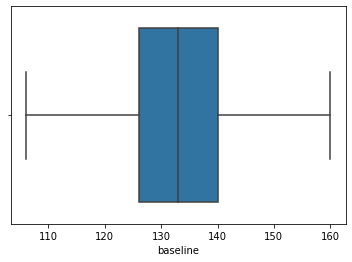

In [184]:
sns.boxplot(x = df.baseline);

#### 2) accelerations

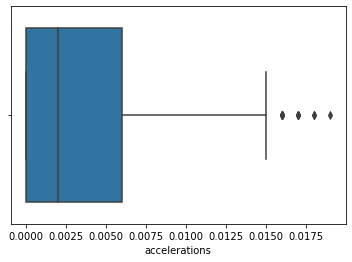

In [185]:
sns.boxplot(x= df.accelerations);

In [186]:
q1 = df.accelerations.quantile(0.25)
q3 = df.accelerations.quantile(0.75)
IQR = q3 - q1
ub = q3 + 1.5 * IQR
lb = q1  - 1.5 * IQR

In [187]:
len(df[df.accelerations > ub]) # total outliers values

14

In [188]:
df[df.accelerations > ub] 

,baseline,accelerations,uterine_contractions,light_decelerations,abnrml_ST_variability,mean_ST_variability,abnrml_LT_variability,mean_of_LT_variability,hist_width,hist_min,hist_max,hist_no_of_peaks,hist_mode,hist_mean,hist_median,hist_var,hist_tendency,fetal_health
181,138.0,0.017,0.005,0.000,35.0,5.3,0.0,4.5,148.0,52.0,200.0,11.0,146.0,157.0,161.0,72.0,1.0,1.0
497,130.0,0.016,0.002,0.000,34.0,2.1,0.0,3.0,132.0,50.0,182.0,8.0,159.0,151.0,155.0,25.0,1.0,1.0
529,142.0,0.019,0.000,0.000,32.0,2.3,0.0,0.0,144.0,56.0,200.0,10.0,170.0,158.0,162.0,37.0,1.0,1.0
530,142.0,0.016,0.000,0.002,32.0,3.1,0.0,1.6,149.0,51.0,200.0,10.0,167.0,154.0,160.0,55.0,1.0,1.0
531,142.0,0.016,0.004,0.000,38.0,1.3,0.0,0.0,130.0,68.0,198.0,5.0,180.0,173.0,177.0,14.0,1.0,1.0
552,136.0,0.016,0.004,0.000,35.0,4.9,0.0,5.2,148.0,52.0,200.0,11.0,146.0,159.0,162.0,74.0,1.0,1.0
630,134.0,0.017,0.004,0.000,48.0,2.2,0.0,0.0,120.0,50.0,170.0,5.0,160.0,150.0,155.0,28.0,1.0,1.0
1093,122.0,0.016,0.001,0.000,22.0,2.2,0.0,1.9,52.0,100.0,152.0,1.0,131.0,133.0,134.0,5.0,0.0,1.0
1094,122.0,0.018,0.002,0.000,22.0,2.5,0.0,2.2,52.0,100.0,152.0,1.0,136.0,132.0,134.0,6.0,0.0,1.0
1096,123.0,0.017,0.002,0.000,24.0,2.2,0.0,1.7,52.0,100.0,152.0,1.0,136.0,133.0,135.0,5.0,0.0,1.0


In [189]:
df.accelerations = np.where(df.accelerations > ub,ub,df.accelerations)

In [190]:
len(df[df.accelerations > ub])

0

#### 3) uterine_contractions

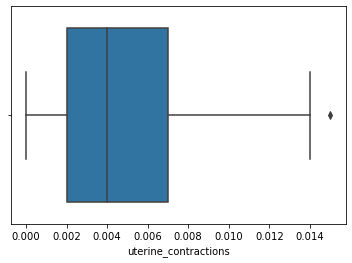

In [191]:
sns.boxplot(x = df.uterine_contractions);

In [192]:
q1 = df.uterine_contractions.quantile(0.25)
q3 = df.uterine_contractions.quantile(0.75)
IQR = q3 - q1
ub = q3 + 1.5 * IQR
lb = q1 - 1.5 * IQR

In [193]:
df[df.uterine_contractions > ub]

,baseline,accelerations,uterine_contractions,light_decelerations,abnrml_ST_variability,mean_ST_variability,abnrml_LT_variability,mean_of_LT_variability,hist_width,hist_min,hist_max,hist_no_of_peaks,hist_mode,hist_mean,hist_median,hist_var,hist_tendency,fetal_health
1164,131.0,0.011,0.015,0.0,26.0,1.5,0.0,3.0,61.0,109.0,170.0,2.0,155.0,151.0,154.0,11.0,1.0,1.0


In [194]:
df.drop(df[df.uterine_contractions > ub].index,inplace = True)

In [195]:
len(df[df.uterine_contractions > ub])

0

#### 4) light_decelerations

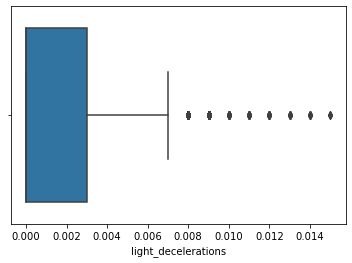

In [196]:
sns.boxplot(x = df.light_decelerations);

In [197]:
q1 = df.light_decelerations.quantile(0.25)
q3 = df.light_decelerations.quantile(0.75)
IQR = q3 - q1
ub = q3 + 1.5 * IQR

In [198]:
len(df[df.light_decelerations > ub])

150

In [199]:
df.light_decelerations = np.where(df.light_decelerations > ub,ub,df.light_decelerations)

In [200]:
len(df[df.light_decelerations > ub])

0

#### 5) abnrml_ST_variability

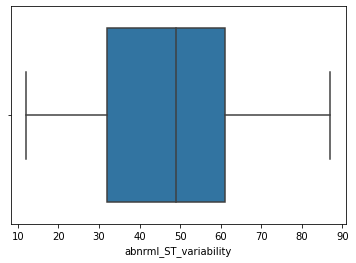

In [201]:
sns.boxplot(x = df.abnrml_ST_variability);

#### 6) mean_ST_variability

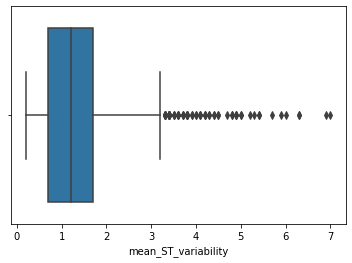

In [202]:
sns.boxplot(x = df.mean_ST_variability);

In [203]:
q1 = df.mean_ST_variability.quantile(0.25)
q3 = df.mean_ST_variability.quantile(0.75)
IQR = q3 - q1
ub = q3 + 1.5 * IQR
lb = q1 - 1.5 * IQR

In [204]:
len(df[df.mean_ST_variability > ub]) # no of ouliers

70

In [205]:
df[df.mean_ST_variability > ub] #outliers

,baseline,accelerations,uterine_contractions,light_decelerations,abnrml_ST_variability,mean_ST_variability,abnrml_LT_variability,mean_of_LT_variability,hist_width,hist_min,hist_max,hist_no_of_peaks,hist_mode,hist_mean,hist_median,hist_var,hist_tendency,fetal_health
5,134.0,0.001,0.010,0.0075,26.0,5.9,0.0,0.0,150.0,50.0,200.0,5.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.013,0.0075,29.0,6.3,0.0,0.0,150.0,50.0,200.0,6.0,71.0,107.0,106.0,215.0,0.0,3.0
28,132.0,0.000,0.001,0.0075,29.0,4.4,0.0,10.5,141.0,50.0,191.0,7.0,133.0,119.0,129.0,73.0,0.0,2.0
29,132.0,0.000,0.000,0.0075,26.0,6.0,0.0,5.0,143.0,50.0,193.0,10.0,133.0,113.0,117.0,89.0,0.0,1.0
30,132.0,0.000,0.002,0.0075,26.0,4.5,0.0,12.5,149.0,50.0,199.0,9.0,133.0,120.0,126.0,56.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,129.0,0.000,0.005,0.0075,58.0,3.9,0.0,0.0,158.0,72.0,230.0,10.0,113.0,90.0,124.0,28.0,-1.0,1.0
2034,129.0,0.000,0.006,0.0050,67.0,3.3,0.0,0.0,129.0,63.0,192.0,7.0,105.0,80.0,107.0,14.0,-1.0,3.0
2048,128.0,0.000,0.008,0.0075,63.0,4.2,0.0,0.0,90.0,66.0,156.0,5.0,69.0,73.0,118.0,128.0,0.0,3.0
2049,125.0,0.005,0.007,0.0000,66.0,4.1,5.0,0.3,23.0,123.0,146.0,0.0,133.0,126.0,134.0,1.0,0.0,1.0


In [206]:
df[df.mean_ST_variability > ub].fetal_health.value_counts().sort_index()

1.0    60
2.0     3
3.0     7
Name: fetal_health, dtype: int64

In [207]:
df.mean_ST_variability = np.where(df.mean_ST_variability > ub,ub,df.mean_ST_variability)

In [208]:
len(df[df.mean_ST_variability > ub])

0

#### 7) abnrml_LT_variability

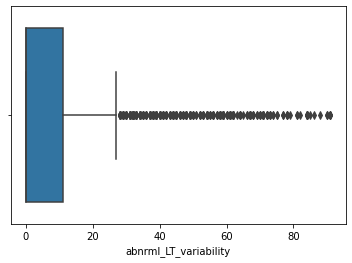

In [209]:
sns.boxplot(x = df.abnrml_LT_variability);

In [210]:
q3 = df.abnrml_LT_variability.quantile(0.75)
q1 = df.abnrml_LT_variability.quantile(0.25)
IQR = q3 - q1
ub = q3 + 1.5 * IQR

In [211]:
len(df[df.abnrml_LT_variability > ub])# so many outliers;lets drop some and adjust rest

309

In [212]:
ub

27.5

In [213]:
df.drop(df[df.abnrml_LT_variability > 2*ub].index,inplace = True)

In [214]:
len(df[df.abnrml_LT_variability > ub])

200

In [215]:
df.abnrml_LT_variability = np.where(df.abnrml_LT_variability > ub,ub,df.abnrml_LT_variability)

In [216]:
len(df[df.abnrml_LT_variability > ub])

0

#### 8) mean_of_LT_variability

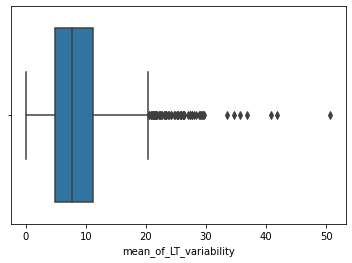

In [217]:
sns.boxplot(x = df.mean_of_LT_variability);

In [218]:
q3 = df.mean_of_LT_variability.quantile(0.75)
q1 = df.mean_of_LT_variability.quantile(0.25)
IQR = q3 - q1
ub = q3 + 1.5 * IQR

In [219]:
len(df[df.mean_of_LT_variability > ub])

70

In [220]:
ub

20.4

In [221]:
df.drop(df[df.mean_of_LT_variability > 1.5 * ub].index,inplace = True)

In [222]:
len(df[df.mean_of_LT_variability > ub])

63

In [223]:
df.mean_of_LT_variability = np.where(df.mean_of_LT_variability > ub,ub,df.mean_of_LT_variability)

In [224]:
len(df[df.mean_of_LT_variability > ub])

0

#### 9) hist_width

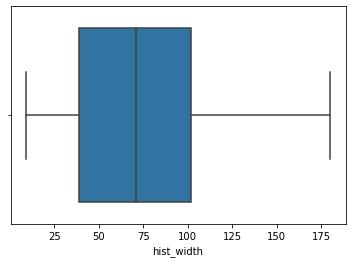

In [225]:
sns.boxplot(x = df.hist_width);

#### 10) hist_min

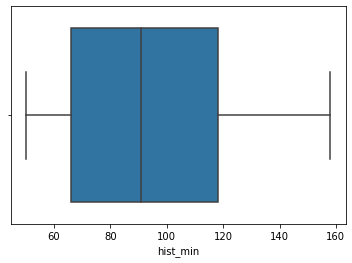

In [226]:
sns.boxplot(x = df.hist_min);

#### 11) hist_max

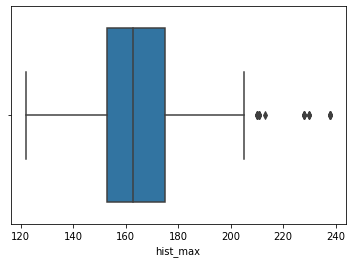

In [227]:
sns.boxplot(x = df.hist_max);

In [228]:
q3 = df.hist_max.quantile(0.75)
q1 = df.hist_max.quantile(0.25)
IQR = q3 - q1
ub = q3 + 1.5 * IQR

In [229]:
ub

208.0

In [230]:
len(df[df.hist_max > ub])

24

In [231]:
df[df.hist_max > ub].fetal_health.value_counts()

1.0    18
3.0     6
Name: fetal_health, dtype: int64

In [232]:
df.hist_max = np.where(df.hist_max > ub,ub,df.hist_max)

In [233]:
len(df[df.hist_max > ub])

0

#### 12) hist_no_of_peaks

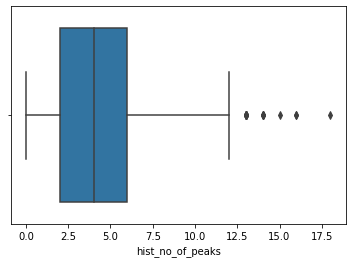

In [234]:
sns.boxplot(x = df.hist_no_of_peaks);

In [235]:
q3 = df.hist_no_of_peaks.quantile(0.75)
q1 = df.hist_no_of_peaks.quantile(0.25)
IQR = q3 - q1
ub = q3 + 1.5 * IQR

In [236]:
len(df[df.hist_no_of_peaks > ub])

19

In [237]:
df.hist_no_of_peaks = np.where(df.hist_no_of_peaks > ub,ub,df.hist_no_of_peaks)

In [238]:
len(df[df.hist_no_of_peaks > ub])

0

#### 13) hist_mode

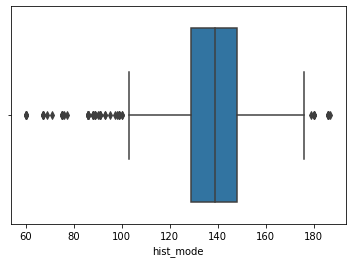

In [239]:
sns.boxplot(x = df.hist_mode);

In [240]:
q3 = df.hist_mode.quantile(0.75)
q1 = df.hist_mode.quantile(0.25)
IQR = q3 - q1
ub = q3 + 1.5 * IQR
lb = q1 - 1.5 * IQR

In [241]:
len(df[df.hist_mode < lb]) + len(df[df.hist_mode > ub])

73

In [242]:
df.hist_mode = np.where(df.hist_mode > ub,ub,np.where(df.hist_mode < lb,lb,df.hist_mode))

In [243]:
len(df[df.hist_mode < lb]) + len(df[df.hist_mode > ub])

0

#### 14) hist_mean

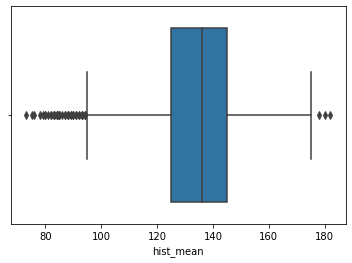

In [244]:
sns.boxplot(x = df.hist_mean);

In [245]:
q3 = df.hist_mean.quantile(0.75)
q1 = df.hist_mean.quantile(0.25)
IQR = q3 - q1
ub = q3 + 1.5 * IQR
lb = q1 - 1.5 * IQR

In [246]:
len(df[df.hist_mean < lb]) + len(df[df.hist_mean > ub])

45

In [247]:
df.hist_mean = np.where(df.hist_mean > ub,ub,np.where(df.hist_mean < lb,lb,df.hist_mean))

In [248]:
len(df[df.hist_mean < lb]) + len(df[df.hist_mean > ub])

0

####  15) hist_median

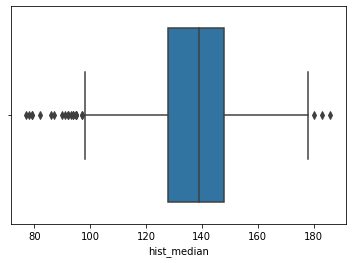

In [249]:
sns.boxplot(x = df.hist_median);

In [250]:
q3 = df.hist_median.quantile(0.75)
q1 = df.hist_median.quantile(0.25)
IQR = q3 - q1
ub = q3 + 1.5 * IQR
lb = q1 - 1.5 * IQR

In [251]:
len(df[df.hist_median < lb]) + len(df[df.hist_median > ub])

23

In [252]:
df.hist_median = np.where(df.hist_median > ub,ub,np.where(df.hist_median < lb,lb,df.hist_median))

In [253]:
len(df[df.hist_median < lb]) + len(df[df.hist_median > ub])

0

#### 16) hist_var

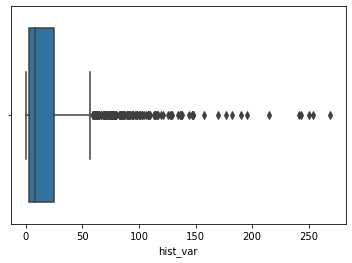

In [254]:
sns.boxplot(x = df.hist_var);

In [255]:
df.columns

Index(['baseline', 'accelerations', 'uterine_contractions',
       'light_decelerations', 'abnrml_ST_variability', 'mean_ST_variability',
       'abnrml_LT_variability', 'mean_of_LT_variability', 'hist_width',
       'hist_min', 'hist_max', 'hist_no_of_peaks', 'hist_mode', 'hist_mean',
       'hist_median', 'hist_var', 'hist_tendency', 'fetal_health'],
      dtype='object')

In [256]:
q3 = df.hist_var.quantile(0.75)
q1 = df.hist_var.quantile(0.25)
IQR = q3 - q1
ub = q3 + 1.5 * IQR
lb = q1 - 1.5 * IQR

In [257]:
len(df[df.hist_var > ub])

184

In [258]:
df.hist_var = np.where(df.hist_var > ub,ub,df.hist_var)

In [259]:
len(df[df.hist_var > ub])

0

# STATISTICAL TESTS

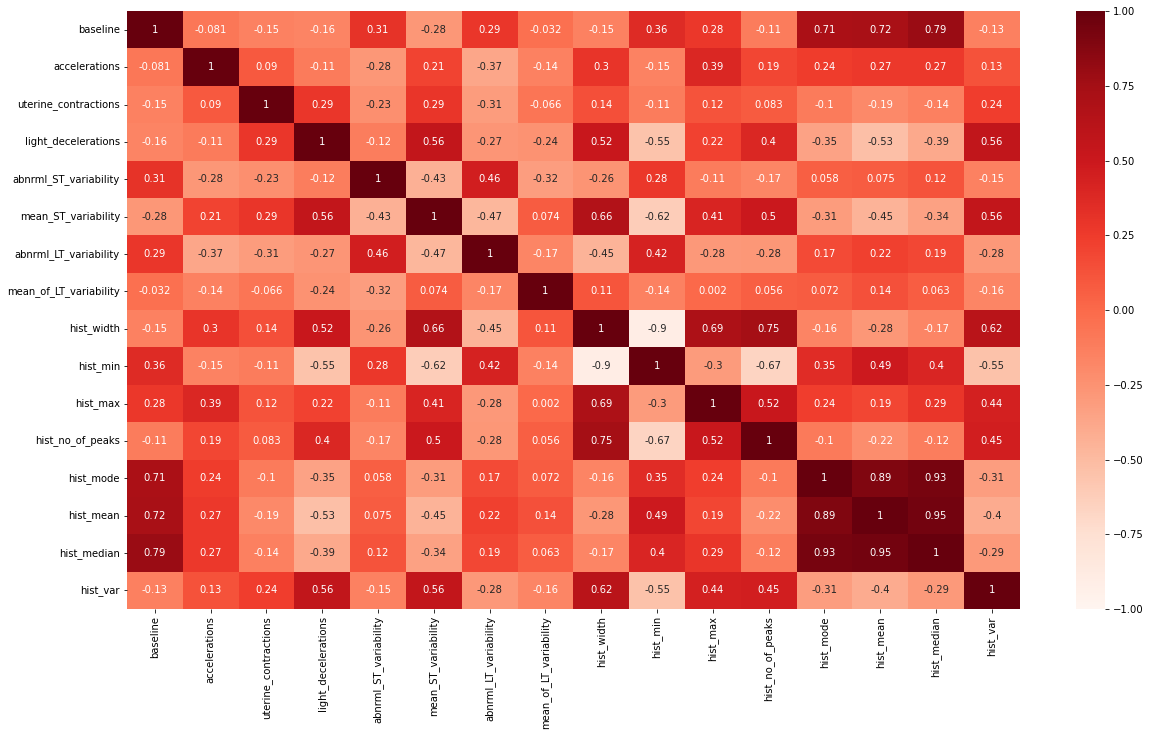

In [260]:
plt.figure(figsize=(20,11));
sns.heatmap(cont_features.corr(),vmin = -1,vmax = 1,annot=True,cmap = 'Reds');

In [261]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [262]:
vif= cont_features
vif=pd.DataFrame()
vif['FEATURE']=cont_features.columns

vif['VIF']=[variance_inflation_factor(cont_features.values,i)for i in range(len(cont_features.columns))]
print(vif)

                   FEATURE          VIF
0                 baseline   697.340142
1            accelerations     4.717564
2     uterine_contractions     3.962631
3      light_decelerations     3.833837
4    abnrml_ST_variability    15.741282
5      mean_ST_variability     9.382637
6    abnrml_LT_variability     2.358030
7   mean_of_LT_variability     5.980798
8               hist_width          inf
9                 hist_min          inf
10                hist_max          inf
11        hist_no_of_peaks     6.734765
12               hist_mode   619.777903
13               hist_mean  1439.921280
14             hist_median  2083.003702
15                hist_var     3.087393


In [263]:
df.drop(['baseline','hist_width','hist_min','hist_max','hist_mode','hist_mean','hist_median'],axis = 1,inplace = True)

In [264]:
df.columns

Index(['accelerations', 'uterine_contractions', 'light_decelerations',
       'abnrml_ST_variability', 'mean_ST_variability', 'abnrml_LT_variability',
       'mean_of_LT_variability', 'hist_no_of_peaks', 'hist_var',
       'hist_tendency', 'fetal_health'],
      dtype='object')

In [265]:
cont_features = df.iloc[:,[0,1,2,3,4,5,6,7,8]] #continuous variables
cont_features

,accelerations,uterine_contractions,light_decelerations,abnrml_ST_variability,mean_ST_variability,abnrml_LT_variability,mean_of_LT_variability,hist_no_of_peaks,hist_var
0,0.000,0.000,0.000,73.0,0.5,27.5,2.4,2.0,58.0
1,0.006,0.006,0.003,17.0,2.1,0.0,10.4,6.0,12.0
2,0.003,0.008,0.003,16.0,2.1,0.0,13.4,5.0,13.0
3,0.003,0.008,0.003,16.0,2.4,0.0,20.4,11.0,13.0
4,0.007,0.008,0.000,16.0,2.4,0.0,19.9,9.0,11.0
...,...,...,...,...,...,...,...,...,...
2121,0.000,0.007,0.000,79.0,0.2,25.0,7.2,4.0,2.0
2122,0.001,0.007,0.000,78.0,0.4,22.0,7.1,6.0,3.0
2123,0.001,0.007,0.000,79.0,0.4,20.0,6.1,5.0,4.0
2124,0.001,0.006,0.000,78.0,0.4,27.0,7.0,6.0,4.0


In [266]:
vif= cont_features
vif=pd.DataFrame()
vif['FEATURE']=cont_features.columns

vif['VIF']=[variance_inflation_factor(cont_features.values,i)for i in range(len(cont_features.columns))]
print(vif)

                  FEATURE       VIF
0           accelerations  2.376174
1    uterine_contractions  3.556454
2     light_decelerations  4.001274
3   abnrml_ST_variability  5.258422
4     mean_ST_variability  8.711974
5   abnrml_LT_variability  2.034155
6  mean_of_LT_variability  3.368643
7        hist_no_of_peaks  4.958460
8                hist_var  4.404451


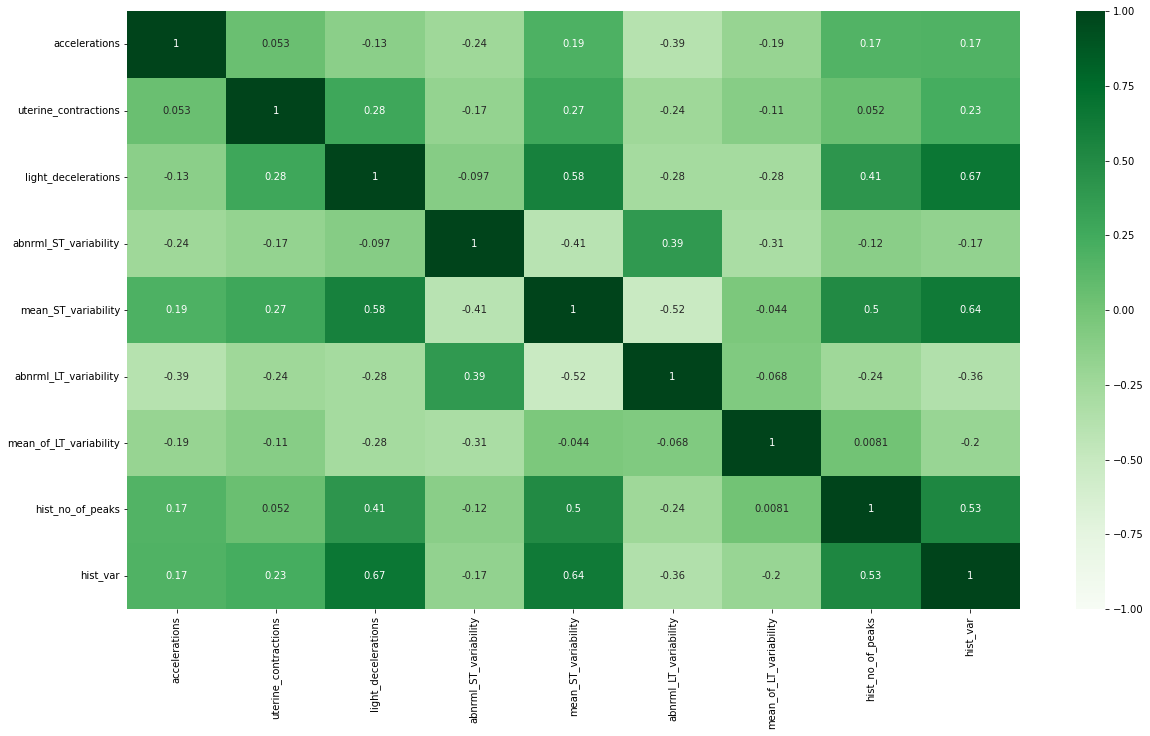

In [267]:
plt.figure(figsize=(20,11));
sns.heatmap(cont_features.corr(),vmin = -1,vmax = 1,annot=True,cmap = 'Greens');

In [268]:
df.head()

,accelerations,uterine_contractions,light_decelerations,abnrml_ST_variability,mean_ST_variability,abnrml_LT_variability,mean_of_LT_variability,hist_no_of_peaks,hist_var,hist_tendency,fetal_health
0,0.000,0.000,0.000,73.0,0.5,27.5,2.4,2.0,58.0,1.0,2.0
1,0.006,0.006,0.003,17.0,2.1,0.0,10.4,6.0,12.0,0.0,1.0
2,0.003,0.008,0.003,16.0,2.1,0.0,13.4,5.0,13.0,0.0,1.0
3,0.003,0.008,0.003,16.0,2.4,0.0,20.4,11.0,13.0,1.0,1.0
4,0.007,0.008,0.000,16.0,2.4,0.0,19.9,9.0,11.0,1.0,1.0


In [269]:
df.columns

Index(['accelerations', 'uterine_contractions', 'light_decelerations',
       'abnrml_ST_variability', 'mean_ST_variability', 'abnrml_LT_variability',
       'mean_of_LT_variability', 'hist_no_of_peaks', 'hist_var',
       'hist_tendency', 'fetal_health'],
      dtype='object')

## ANOVA

In [270]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [271]:
anv_mdl = ols('accelerations ~ fetal_health',data = df).fit()
anv_tbl = sm.stats.anova_lm(anv_mdl)
anv_tbl

,df,sum_sq,mean_sq,F,PR(>F)
fetal_health,1.0,0.003459,0.003459,262.946592,1.152514e-55
Residual,2007.0,0.026405,0.000013,NaN,NaN


In [272]:
anv_mdl = ols('uterine_contractions ~ fetal_health',data = df).fit()
anv_tbl = sm.stats.anova_lm(anv_mdl)
anv_tbl

,df,sum_sq,mean_sq,F,PR(>F)
fetal_health,1.0,0.000238,0.000238,28.717412,9.336984e-08
Residual,2007.0,0.016666,0.000008,NaN,NaN


In [273]:
anv_mdl = ols('light_decelerations ~ fetal_health',data = df).fit()
anv_tbl = sm.stats.anova_lm(anv_mdl)
anv_tbl

,df,sum_sq,mean_sq,F,PR(>F)
fetal_health,1.0,0.000126,0.000126,19.424908,0.000011
Residual,2007.0,0.013061,0.000007,NaN,NaN


In [274]:
anv_mdl = ols('abnrml_ST_variability ~ fetal_health',data = df).fit()
anv_tbl = sm.stats.anova_lm(anv_mdl)
anv_tbl

,df,sum_sq,mean_sq,F,PR(>F)
fetal_health,1.0,97503.296074,97503.296074,420.666533,5.003892e-85
Residual,2007.0,465188.219108,231.782870,NaN,NaN


In [275]:
anv_mdl = ols('mean_ST_variability ~ fetal_health',data = df).fit() 
anv_tbl = sm.stats.anova_lm(anv_mdl)
anv_tbl #drop

,df,sum_sq,mean_sq,F,PR(>F)
fetal_health,1.0,0.231143,0.231143,0.404815,0.524686
Residual,2007.0,1145.964955,0.570984,NaN,NaN


In [276]:
anv_mdl = ols('abnrml_LT_variability ~ fetal_health',data = df).fit()
anv_tbl = sm.stats.anova_lm(anv_mdl)
anv_tbl

,df,sum_sq,mean_sq,F,PR(>F)
fetal_health,1.0,9879.512232,9879.512232,120.279658,3.200431e-27
Residual,2007.0,164850.660989,82.137848,NaN,NaN


In [277]:
anv_mdl = ols('mean_of_LT_variability ~ fetal_health',data = df).fit()
anv_tbl = sm.stats.anova_lm(anv_mdl)
anv_tbl

,df,sum_sq,mean_sq,F,PR(>F)
fetal_health,1.0,2152.636134,2152.636134,87.90774,1.785206e-20
Residual,2007.0,49146.306155,24.487447,NaN,NaN


In [278]:
anv_mdl = ols('hist_no_of_peaks ~ fetal_health',data = df).fit()
anv_tbl = sm.stats.anova_lm(anv_mdl)
anv_tbl

,df,sum_sq,mean_sq,F,PR(>F)
fetal_health,1.0,36.424821,36.424821,4.341472,0.037321
Residual,2007.0,16838.672242,8.389971,NaN,NaN


In [279]:
anv_mdl = ols('hist_var ~ fetal_health',data = df).fit()
anv_tbl = sm.stats.anova_lm(anv_mdl)
anv_tbl

,df,sum_sq,mean_sq,F,PR(>F)
fetal_health,1.0,22946.369076,22946.369076,69.057898,1.737977e-16
Residual,2007.0,666880.456211,332.277258,NaN,NaN


## CHI 2

In [280]:
from scipy.stats import chi2_contingency

In [281]:
chi2_contingency(pd.crosstab(df.hist_tendency,df.fetal_health))[1]

1.462731719810631e-38

In [282]:
df.drop(['mean_ST_variability'],axis =1 ,inplace = True)

In [283]:
df.columns

Index(['accelerations', 'uterine_contractions', 'light_decelerations',
       'abnrml_ST_variability', 'abnrml_LT_variability',
       'mean_of_LT_variability', 'hist_no_of_peaks', 'hist_var',
       'hist_tendency', 'fetal_health'],
      dtype='object')

In [284]:
df.head()

,accelerations,uterine_contractions,light_decelerations,abnrml_ST_variability,abnrml_LT_variability,mean_of_LT_variability,hist_no_of_peaks,hist_var,hist_tendency,fetal_health
0,0.000,0.000,0.000,73.0,27.5,2.4,2.0,58.0,1.0,2.0
1,0.006,0.006,0.003,17.0,0.0,10.4,6.0,12.0,0.0,1.0
2,0.003,0.008,0.003,16.0,0.0,13.4,5.0,13.0,0.0,1.0
3,0.003,0.008,0.003,16.0,0.0,20.4,11.0,13.0,1.0,1.0
4,0.007,0.008,0.000,16.0,0.0,19.9,9.0,11.0,1.0,1.0


In [285]:
df.shape

(2009, 10)

# MODELS


### X and y 

In [286]:
X = df.drop(['fetal_health'],axis = 1)
y = df['fetal_health']

In [287]:
print(X.shape)
print(y.shape)

(2009, 9)
(2009,)


### Standardize

In [288]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [289]:
X = sc.fit_transform(X)

### train and test

In [290]:
from sklearn.model_selection import train_test_split

In [291]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 808) #split for non-smote data

In [292]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1607, 9)
(402, 9)
(1607,)
(402,)


# SMOTE

In [293]:
df.fetal_health.value_counts()

1.0    1627
2.0     251
3.0     131
Name: fetal_health, dtype: int64

In [294]:
norm = df[df.fetal_health == 1.0]
susp = df[df.fetal_health == 2.0]
ptlg = df[df.fetal_health == 3.0]

In [295]:
norm.shape

(1627, 10)

In [296]:
susp_oversample = resample(susp,replace = True,n_samples = len(norm),random_state = 8)

In [297]:
susp_oversample.shape

(1627, 10)

In [298]:
ptlg_oversample = resample(ptlg,replace = True,n_samples = len(norm),random_state = 8)

In [299]:
ptlg_oversample.shape

(1627, 10)

In [300]:
df_smote = pd.concat([norm,susp_oversample,ptlg_oversample],axis = 0)

In [301]:
df_smote = df_smote.sample(frac = 1).reset_index(drop = True) #shuffle

In [302]:
df_smote.fetal_health.value_counts()

3.0    1627
2.0    1627
1.0    1627
Name: fetal_health, dtype: int64

### X and y 

In [303]:
Xs = df_smote.drop(['fetal_health'],axis = 1)
ys = df_smote['fetal_health']

In [304]:
print(Xs.shape)
print(ys.shape)

(4881, 9)
(4881,)


### Standardize

In [305]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [306]:
Xs = sc.fit_transform(Xs)

### train and test

In [307]:
from sklearn.model_selection import train_test_split

In [308]:
Xtrain,Xtest,ytrain,ytest = train_test_split(Xs,ys,test_size = 0.2,random_state = 808) #split for smote data

In [309]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3904, 9)
(977, 9)
(3904,)
(977,)


## 5) LOGISTIC REGRESSION 

In [310]:
from sklearn.linear_model import LogisticRegression

### STATISTICAL METHODS

### one vs rest

In [311]:
ovr = LogisticRegression(multi_class = 'ovr',random_state = 86)

In [312]:
model5 = ovr.fit(X_train,y_train)

In [313]:
accuracy_score(model5.predict(X_train),y_train)

0.8904791537025514

##### evaluation

In [314]:
y_pred5 = model5.predict(X_test)

In [315]:
accuracy_score(y_pred5,y_test)#                                                                               0.8582089552238806

0.8582089552238806

In [316]:
pd.DataFrame(confusion_matrix(y_test,y_pred5,labels = [1,2,3]),index = [1,2,3],columns = [1,2,3])

,1,2,3
1,304,9,7
2,30,29,1
3,7,3,12


In [317]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

         1.0       0.89      0.95      0.92       320
         2.0       0.71      0.48      0.57        60
         3.0       0.60      0.55      0.57        22

    accuracy                           0.86       402
   macro avg       0.73      0.66      0.69       402
weighted avg       0.85      0.86      0.85       402



### one vs rest - smote

In [318]:
ovr = LogisticRegression(multi_class = 'ovr',random_state = 86)

In [319]:
model6 = ovr.fit(Xtrain,ytrain)

In [320]:
accuracy_score(model6.predict(Xtrain),ytrain)

0.8253073770491803

##### evaluation

In [321]:
y_pred6 = model6.predict(Xtest)

In [322]:
accuracy_score(y_pred6,ytest)#                                                                                 0.812691914022518

0.8239508700102354

In [323]:
pd.DataFrame(confusion_matrix(ytest,y_pred6,labels = [1,2,3]),index = [1,2,3],columns = [1,2,3])

,1,2,3
1,268,39,18
2,42,260,25
3,5,43,277


In [324]:
print(classification_report(ytest,y_pred6))

              precision    recall  f1-score   support

         1.0       0.85      0.82      0.84       325
         2.0       0.76      0.80      0.78       327
         3.0       0.87      0.85      0.86       325

    accuracy                           0.82       977
   macro avg       0.83      0.82      0.82       977
weighted avg       0.83      0.82      0.82       977



### mutinomial

In [325]:
multinomial = LogisticRegression(multi_class = 'multinomial',random_state = 86)

In [326]:
model7 = multinomial.fit(X_train,y_train)

In [327]:
accuracy_score(model7.predict(X_train),y_train) 

0.8892345986309894

In [328]:
y_pred7 = model7.predict(X_test)

#### evaluation

In [329]:
accuracy_score(y_pred7,y_test)#                                                                               0.8631840796019901

0.8631840796019901

In [330]:
pd.DataFrame(confusion_matrix(y_test,y_pred7,labels = [1,2,3]),columns = [1,2,3],index = [1,2,3])

,1,2,3
1,304,10,6
2,30,29,1
3,5,3,14


In [331]:
print(classification_report(y_test,y_pred7,labels = [1,2,3]))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92       320
           2       0.69      0.48      0.57        60
           3       0.67      0.64      0.65        22

    accuracy                           0.86       402
   macro avg       0.75      0.69      0.71       402
weighted avg       0.85      0.86      0.85       402



### mutinomial - smote

In [332]:
multinomial = LogisticRegression(multi_class = 'multinomial',random_state = 86)

In [333]:
model8 = multinomial.fit(Xtrain,ytrain)

In [334]:
accuracy_score(model8.predict(Xtrain),ytrain)

0.8242827868852459

In [335]:
y_pred8 = model8.predict(Xtest)

#### evaluation

In [336]:
accuracy_score(y_pred8,ytest)#                                                                                0.8024564994882293

0.8178096212896623

In [337]:
pd.DataFrame(confusion_matrix(ytest,y_pred8,labels = [1,2,3]),columns = [1,2,3],index = [1,2,3])

,1,2,3
1,263,49,13
2,34,267,26
3,3,53,269


In [338]:
print(classification_report(ytest,y_pred8,labels = [1,2,3]))

              precision    recall  f1-score   support

           1       0.88      0.81      0.84       325
           2       0.72      0.82      0.77       327
           3       0.87      0.83      0.85       325

    accuracy                           0.82       977
   macro avg       0.82      0.82      0.82       977
weighted avg       0.82      0.82      0.82       977



### MACHINE LEARNING MODELS

### liblinear

In [339]:
lib = LogisticRegression(solver='liblinear',random_state = 86)

In [340]:
model9 = lib.fit(X_train,y_train)

In [341]:
accuracy_score(model9.predict(X_train),y_train) # accuracy of train data

0.8911014312383323

In [342]:
y_pred9 = model9.predict(X_test)

#### evaluation

In [343]:
accuracy_score(y_pred9,y_test) #                                                                              0.8606965174129353

0.8606965174129353

In [344]:
pd.DataFrame(confusion_matrix(y_test,y_pred9,labels = [1,2,3]),columns = [1,2,3],index = [1,2,3])

,1,2,3
1,304,9,7
2,30,29,1
3,6,3,13


In [345]:
print(classification_report(y_test,y_pred9,labels = [1,2,3]))

              precision    recall  f1-score   support

           1       0.89      0.95      0.92       320
           2       0.71      0.48      0.57        60
           3       0.62      0.59      0.60        22

    accuracy                           0.86       402
   macro avg       0.74      0.67      0.70       402
weighted avg       0.85      0.86      0.85       402



### liblinear - smote

In [346]:
lib = LogisticRegression(solver='liblinear',random_state = 86)

In [347]:
model10 = lib.fit(Xtrain,ytrain)

In [348]:
accuracy_score(model10.predict(Xtrain),ytrain)

0.8253073770491803

In [349]:
y_pred10 = model10.predict(Xtest)

#### evaluation

In [350]:
accuracy_score(y_pred10,ytest) #                                                                               0.812691914022518

0.8239508700102354

In [351]:
pd.DataFrame(confusion_matrix(ytest,y_pred10,labels = [1,2,3]),columns = [1,2,3],index = [1,2,3])

,1,2,3
1,268,38,19
2,42,260,25
3,5,43,277


In [352]:
print(classification_report(ytest,y_pred10,labels = [1,2,3]))

              precision    recall  f1-score   support

           1       0.85      0.82      0.84       325
           2       0.76      0.80      0.78       327
           3       0.86      0.85      0.86       325

    accuracy                           0.82       977
   macro avg       0.83      0.82      0.82       977
weighted avg       0.83      0.82      0.82       977



### lbfgs

In [353]:
lbfgs = LogisticRegression(solver='lbfgs',random_state = 86)

In [354]:
model11 = lbfgs.fit(X_train,y_train)

In [355]:
accuracy_score(model11.predict(X_train),y_train) 

0.8892345986309894

In [356]:
y_pred11 = model11.predict(X_test)

#### evaluation

In [357]:
accuracy_score(y_pred11,y_test) #                                                                             0.8631840796019901

0.8631840796019901

In [358]:
pd.DataFrame(confusion_matrix(y_test,y_pred11,labels = [1,2,3]),columns = [1,2,3],index = [1,2,3])

,1,2,3
1,304,10,6
2,30,29,1
3,5,3,14


In [359]:
print(classification_report(y_test,y_pred11,labels = [1,2,3]))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92       320
           2       0.69      0.48      0.57        60
           3       0.67      0.64      0.65        22

    accuracy                           0.86       402
   macro avg       0.75      0.69      0.71       402
weighted avg       0.85      0.86      0.85       402



### lbfgs - smote

In [360]:
lbfgs = LogisticRegression(solver='lbfgs',random_state = 86)

In [361]:
model12 = lbfgs.fit(Xtrain,ytrain)

In [362]:
accuracy_score(model12.predict(Xtrain),ytrain) 

0.8242827868852459

In [363]:
y_pred12 = model12.predict(Xtest)

#### evaluation

In [364]:
accuracy_score(y_pred12,ytest) #                                                                              0.8024564994882293

0.8178096212896623

In [365]:
pd.DataFrame(confusion_matrix(ytest,y_pred12,labels = [1,2,3]),columns = [1,2,3],index = [1,2,3])

,1,2,3
1,263,49,13
2,34,267,26
3,3,53,269


In [366]:
print(classification_report(ytest,y_pred12,labels = [1,2,3]))

              precision    recall  f1-score   support

           1       0.88      0.81      0.84       325
           2       0.72      0.82      0.77       327
           3       0.87      0.83      0.85       325

    accuracy                           0.82       977
   macro avg       0.82      0.82      0.82       977
weighted avg       0.82      0.82      0.82       977



In [367]:
#saga and sag performs better on large dataset

## 6) DECISION TREE

In [368]:
from sklearn.tree import DecisionTreeClassifier #decision tree after all statistical test

In [369]:
dt = DecisionTreeClassifier(random_state = 86)

In [370]:
params = {'criterion' : ['gini','entropy'],
          'max_depth': [2,3,4,5,6,7,8,9,None],
          'min_samples_split' : [i for i in range (1,11)]}

search = GridSearchCV(dt,params,cv = 10)
search.fit(X_train,y_train)
search.best_params_

In [371]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 6,min_samples_split = 8,random_state = 86)

In [372]:
model13 = dt.fit(X_train,y_train)

In [373]:
accuracy_score(model13.predict(X_train),y_train) 

0.9471064094586186

In [374]:
y_pred13 = model13.predict(X_test)

#### evaluation

In [375]:
accuracy_score(y_pred13,y_test)#                                                                              0.9203980099502488

0.9203980099502488

In [376]:
pd.DataFrame(confusion_matrix(y_test,y_pred13,labels = [1,2,3]),columns = [1,2,3],index = [1,2,3])

,1,2,3
1,313,2,5
2,22,38,0
3,2,1,19


In [377]:
print(classification_report(y_test,y_pred13))

              precision    recall  f1-score   support

         1.0       0.93      0.98      0.95       320
         2.0       0.93      0.63      0.75        60
         3.0       0.79      0.86      0.83        22

    accuracy                           0.92       402
   macro avg       0.88      0.83      0.84       402
weighted avg       0.92      0.92      0.92       402



## 7) DECISION TREE - smote

In [378]:
dt = DecisionTreeClassifier(random_state = 86) 

In [379]:
params = {'criterion' : ['gini','entropy'],
          'max_depth': [2,3,4,5,6,7,8,9,None],
          'min_samples_split' : [i for i in range (1,11)]}

search = GridSearchCV(dt,params,cv = 10)
search.fit(Xtrain,ytrain)
search.best_params_

In [380]:
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = None ,min_samples_split = 2,random_state = 83)

In [381]:
model14 = dt.fit(Xtrain,ytrain)

In [382]:
accuracy_score(model14.predict(Xtrain),ytrain) 

0.9974385245901639

In [383]:
y_pred14 = model14.predict(Xtest)

#### evaluation

In [384]:
accuracy_score(y_pred14,ytest)#                                                                               0.9733879222108496

0.9764585465711362

In [385]:
pd.DataFrame(confusion_matrix(ytest,y_pred14,labels = [1,2,3]),columns = [1,2,3],index = [1,2,3])

,1,2,3
1,305,16,4
2,0,324,3
3,0,0,325


In [386]:
print(classification_report(ytest,y_pred14))

              precision    recall  f1-score   support

         1.0       1.00      0.94      0.97       325
         2.0       0.95      0.99      0.97       327
         3.0       0.98      1.00      0.99       325

    accuracy                           0.98       977
   macro avg       0.98      0.98      0.98       977
weighted avg       0.98      0.98      0.98       977



## 8) RANDOM FOREST 

In [387]:
from sklearn.ensemble import RandomForestClassifier

In [388]:
rf = RandomForestClassifier(random_state = 86)

In [389]:
params = {'criterion' : ['gini','entropy'],
          'n_estimators':[20,40,60,80,100,120],
          'max_features':['sqrt',0.25,0.50,0.75,1]}

In [ ]:
search = GridSearchCV(rf,params,n_jobs = -1,cv = 10)
search.fit(X_train,y_train)
search.best_params_

In [390]:
rf = RandomForestClassifier(criterion = 'entropy',max_features = 0.75,n_estimators = 40,random_state = 86)

In [391]:
model15 = rf.fit(X_train,y_train)

In [392]:
accuracy_score(model15.predict(X_train),y_train) 

0.9981331673926571

In [393]:
y_pred15 = model15.predict(X_test)

#### evaluation

In [394]:
accuracy_score(y_test,y_pred15)#                                                                              0.9402985074626866

0.9402985074626866

In [395]:
pd.DataFrame(confusion_matrix(y_test,y_pred15,labels = [1,2,3]),columns = [1,2,3],index = [1,2,3])

,1,2,3
1,317,3,0
2,18,42,0
3,2,1,19


In [396]:
print(classification_report(y_test,y_pred15))

              precision    recall  f1-score   support

         1.0       0.94      0.99      0.96       320
         2.0       0.91      0.70      0.79        60
         3.0       1.00      0.86      0.93        22

    accuracy                           0.94       402
   macro avg       0.95      0.85      0.89       402
weighted avg       0.94      0.94      0.94       402



## 9) RANDOM FOREST -smote

In [397]:
rf = RandomForestClassifier(random_state = 86)

In [398]:
params = {'criterion' : ['gini','entropy'],
          'n_estimators':[20,40,60,80,100,120],
          'max_features':['sqrt',0.25,0.50,0.75,1]}

In [ ]:
search = GridSearchCV(rf,params,n_jobs = -1,cv = 10)
search.fit(Xtrain,ytrain)
search.best_params_

In [399]:
rf = RandomForestClassifier(criterion = 'gini',max_features = 0.25,n_estimators = 100,random_state = 83)

In [400]:
model16 = rf.fit(Xtrain,ytrain)

In [401]:
accuracy_score(model16.predict(Xtrain),ytrain) 

0.9974385245901639

In [402]:
y_pred16 = model16.predict(Xtest)

#### evaluation

In [403]:
accuracy_score(ytest,y_pred16)#                                                                               0.9877175025588536

0.9815762538382804

In [404]:
pd.DataFrame(confusion_matrix(ytest,y_pred16,labels = [1,2,3]),columns = [1,2,3],index = [1,2,3])

,1,2,3
1,310,12,3
2,0,324,3
3,0,0,325


In [405]:
print(classification_report(ytest,y_pred16))

              precision    recall  f1-score   support

         1.0       1.00      0.95      0.98       325
         2.0       0.96      0.99      0.98       327
         3.0       0.98      1.00      0.99       325

    accuracy                           0.98       977
   macro avg       0.98      0.98      0.98       977
weighted avg       0.98      0.98      0.98       977



## 10) ADABOOST

In [406]:
from sklearn.ensemble import AdaBoostClassifier

In [407]:
ada = AdaBoostClassifier(random_state = 86)

In [408]:
params = {'n_estimators' : [i for i in range(0,500,50)]}

In [ ]:
search = GridSearchCV(ada,params,n_jobs = -1,cv = 10)
search.fit(X_train,y_train)
search.best_params_

In [409]:
ada = AdaBoostClassifier(n_estimators = 100,random_state = 86)

In [410]:
model17 = ada.fit(X_train,y_train)

In [411]:
accuracy_score(model17.predict(X_train),y_train) 

0.9029247044181705

In [412]:
y_pred17 = model17.predict(X_test)

##### evaluation

In [413]:
accuracy_score(y_test,y_pred17)#                                                                              0.9029850746268657

0.900497512437811

In [414]:
pd.DataFrame(confusion_matrix(y_test,y_pred17,labels = [1,2,3]),columns = [1,2,3],index = [1,2,3])

,1,2,3
1,308,11,1
2,22,37,1
3,4,1,17


In [415]:
print(classification_report(y_test,y_pred17))

              precision    recall  f1-score   support

         1.0       0.92      0.96      0.94       320
         2.0       0.76      0.62      0.68        60
         3.0       0.89      0.77      0.83        22

    accuracy                           0.90       402
   macro avg       0.86      0.78      0.82       402
weighted avg       0.90      0.90      0.90       402



## 10) ADABOOST - smote

In [416]:
from sklearn.ensemble import AdaBoostClassifier

In [417]:
ada = AdaBoostClassifier(random_state = 86)

In [418]:
params = {'n_estimators' : [i for i in range(0,500,50)],
         'learning_rate':[1.0,0.2,0.1,0.01,0.05,0.001]}

search = GridSearchCV(ada,params,n_jobs = -1,cv = 10)
search.fit(Xtrain,ytrain)
search.best_params_

In [419]:
ada = AdaBoostClassifier(n_estimators = 350,learning_rate = 0.2,random_state = 83)

In [420]:
model18 = ada.fit(Xtrain,ytrain)

In [421]:
accuracy_score(model18.predict(Xtrain),ytrain) 

0.867827868852459

In [422]:
y_pred18 = model18.predict(Xtest)

##### evaluation

In [423]:
accuracy_score(ytest,y_pred18) #                                                                              0.8597748208802457

0.8853633572159673

In [424]:
pd.DataFrame(confusion_matrix(ytest,y_pred18,labels = [1,2,3]),columns = [1,2,3],index = [1,2,3])

,1,2,3
1,258,62,5
2,23,296,8
3,0,14,311


In [425]:
print(classification_report(ytest,y_pred18))

              precision    recall  f1-score   support

         1.0       0.92      0.79      0.85       325
         2.0       0.80      0.91      0.85       327
         3.0       0.96      0.96      0.96       325

    accuracy                           0.89       977
   macro avg       0.89      0.89      0.89       977
weighted avg       0.89      0.89      0.89       977



## 11) KNN

In [426]:
from sklearn.neighbors import KNeighborsClassifier

In [427]:
knn = KNeighborsClassifier()

In [428]:
param = {'algorithm' : ['ball_tree','kd_tree','brute'],
         'n_neighbors' :list(np.arange(1,90,2)),
         'weights' :['uniform','distance'],
         'metric': ['euclidean','manhanttan','minkowki']}

search = GridSearchCV(knn,param,cv = 10)
search.fit(X_train,y_train)
search.best_params_

In [429]:
knn = KNeighborsClassifier(algorithm = 'ball_tree',metric = 'euclidean',n_neighbors = 3,weights = 'distance')

In [430]:
model19 = knn.fit(X_train,y_train)

In [431]:
accuracy_score(model19.predict(X_train),y_train) 

0.998755444928438

In [432]:
y_pred19 = model19.predict(X_test)

#### evaluation

In [433]:
accuracy_score(y_test,y_pred19)#                                                                              0.9029850746268657

0.9029850746268657

In [434]:
pd.DataFrame(confusion_matrix(y_test,y_pred19,labels = [1,2,3]),columns = [1,2,3],index = [1,2,3])

,1,2,3
1,307,11,2
2,20,38,2
3,3,1,18


In [435]:
print(classification_report(y_test,y_pred19))

              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94       320
         2.0       0.76      0.63      0.69        60
         3.0       0.82      0.82      0.82        22

    accuracy                           0.90       402
   macro avg       0.84      0.80      0.82       402
weighted avg       0.90      0.90      0.90       402



## 12) KNN - smote

In [436]:
knn = KNeighborsClassifier()

In [437]:
param = {'algorithm' : ['ball_tree','kd_tree','brute'],
         'n_neighbors' :list(np.arange(1,90,2)),
         'weights' :['uniform','distance'],
         'metric': ['euclidean','manhanttan','minkowki']}

search = GridSearchCV(knn,param,cv = 10)
search.fit(Xtrain,ytrain)
search.best_params_

In [438]:
knn = KNeighborsClassifier(algorithm = 'brute',metric = 'euclidean',n_neighbors = 1,weights = 'uniform')

In [439]:
model20 = knn.fit(Xtrain,ytrain)

In [440]:
accuracy_score(model20.predict(Xtrain),ytrain) 

0.9994877049180327

In [441]:
y_pred20 = model20.predict(Xtest)

#### evaluation

In [442]:
accuracy_score(ytest,y_pred20)#                                                                               0.9733879222108496

0.9836233367451381

In [443]:
pd.DataFrame(confusion_matrix(ytest,y_pred20,labels = [1,2,3]),columns = [1,2,3],index = [1,2,3])

,1,2,3
1,312,12,1
2,0,324,3
3,0,0,325


In [444]:
print(classification_report(ytest,y_pred20))

              precision    recall  f1-score   support

         1.0       1.00      0.96      0.98       325
         2.0       0.96      0.99      0.98       327
         3.0       0.99      1.00      0.99       325

    accuracy                           0.98       977
   macro avg       0.98      0.98      0.98       977
weighted avg       0.98      0.98      0.98       977



-----------------------------------------------------------------------------------------------------------------------------------